<div style="text-align:center; font-size:36px; color:black;"><b><u>Credit Card Fraud Detection Capstone Project</u></b></div>

# Author Details:

- <span >**Name:**</span> <span style="font-weight: bold; font-size: 18px;">Viswa Teja</span>


## <font color = black>Problem Statement  <font>
 To predict fraudulent credit card transactions with the help of machine learning models. This is to analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. The data set is taken from the Kaggle website and has a `total of 2,84,807 transactions`; out of these, `492 are fraudulent`. Since the `data set is highly imbalanced`, it needs to be handled before model building.


## <font color = black>Understanding and defining fraud   <font>
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing


## <font color = black>Project pipeline  <font>
The project pipeline can be briefly summarised in the following five steps:

`Data Understanding`: Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
    
`Exploratory data analytics (EDA)`: Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
    
`Train/Test split`: Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
    
`Model building / hyperparameter tuning`: This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.
    
`Model evaluation`: Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

**<font color="black">Input Data:</font>**
- `https://www.kaggle.com/mlg-ulb/creditcardfraud`


# <font color = black> Design flow will be as below <font> 

#### <font color = black> Step 1  <font> - `Reading & Understanding data`
- shape
- info
- describe
- Missing values

#### <font color = black> Step 2  <font> - `EDA`
- Bar plot Fraud vs non-fraud share
- Outlier Treatment 
- Distribution plot Fraud vs non-fraud share
   - classes with `time`
   - classes with `amount`

#### <font color = black> Step 3  <font> - `Data Preperation`
- Train Test split
- Feature Scaling
- Checking the Skewness
- Mitigate skweness with PowerTransformer

#### <font color = black> Step 4  <font> - `Building Model  and evaluating Model ( on imbalanced data set )`
- Logistic regression
- Decision Tree
- XGBoost


#### <font color = black> Step 5  <font> - `Choosing best model on the imbalanced data`    

#### <font color = black> Step 6  <font> - `Handling data imbalance and process each model of Milestone step 7 on each imbalance technique one by one`

- Oversampling
- SMOTE (Synthetic Minority Oversampling Technique)
- AdaSyn (Adaptive Synthetic Sampling)

#### <font color = black> Step 7  <font> - `Building and evaluating Model ( on balanced data set )`
- Logistic regression
- Decision Tree
- XGBoost


#### <font color = black> Step 8  <font> - `Choosing best model on the balanced data`


In [4]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [7]:
#To read csv File from google drive
file_path = "creditcard.csv"
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

### Handling Missing Values

In [16]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that there is no missing value present in the dataframe.

### Outliers treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

### Observe the distribution of our classes

In [22]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

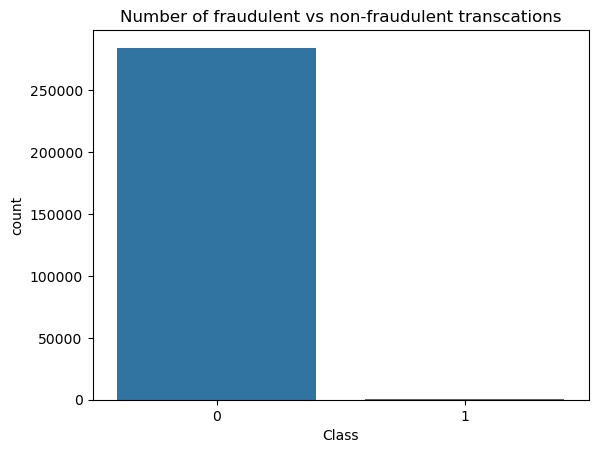

In [24]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

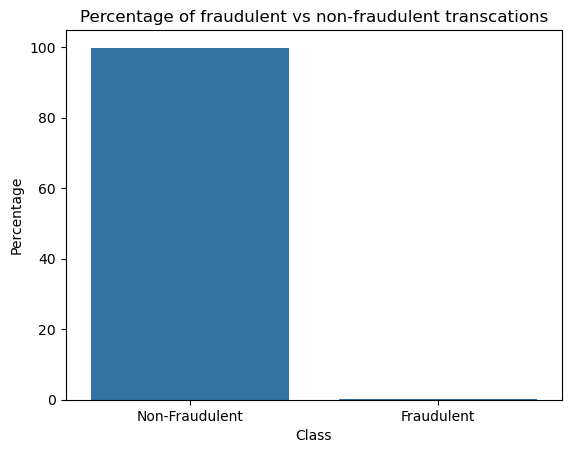

In [26]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percent = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percent = pd.DataFrame(fraud_percent) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percent)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

**Observation**

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

#### Lets observe the distribution of classes with the `time`

In [30]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

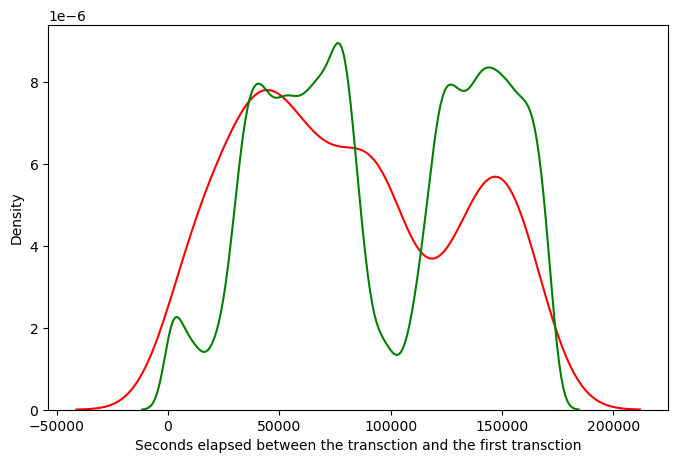

In [32]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False,color='red')
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False,color='green')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

**Observation**

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

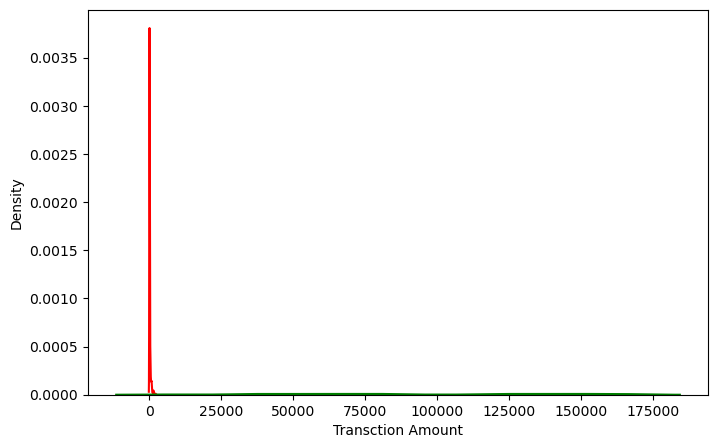

In [35]:
# Lets observe the distribution of classes with the amount
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False,color='red')
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False,color='green')
ax.set(xlabel='Transction Amount')
plt.show()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

Dropping `Time` column as this feature is not going to help in the model building.

In [38]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

#### Plotting the distributions of all the featuers

<Figure size 640x480 with 0 Axes>

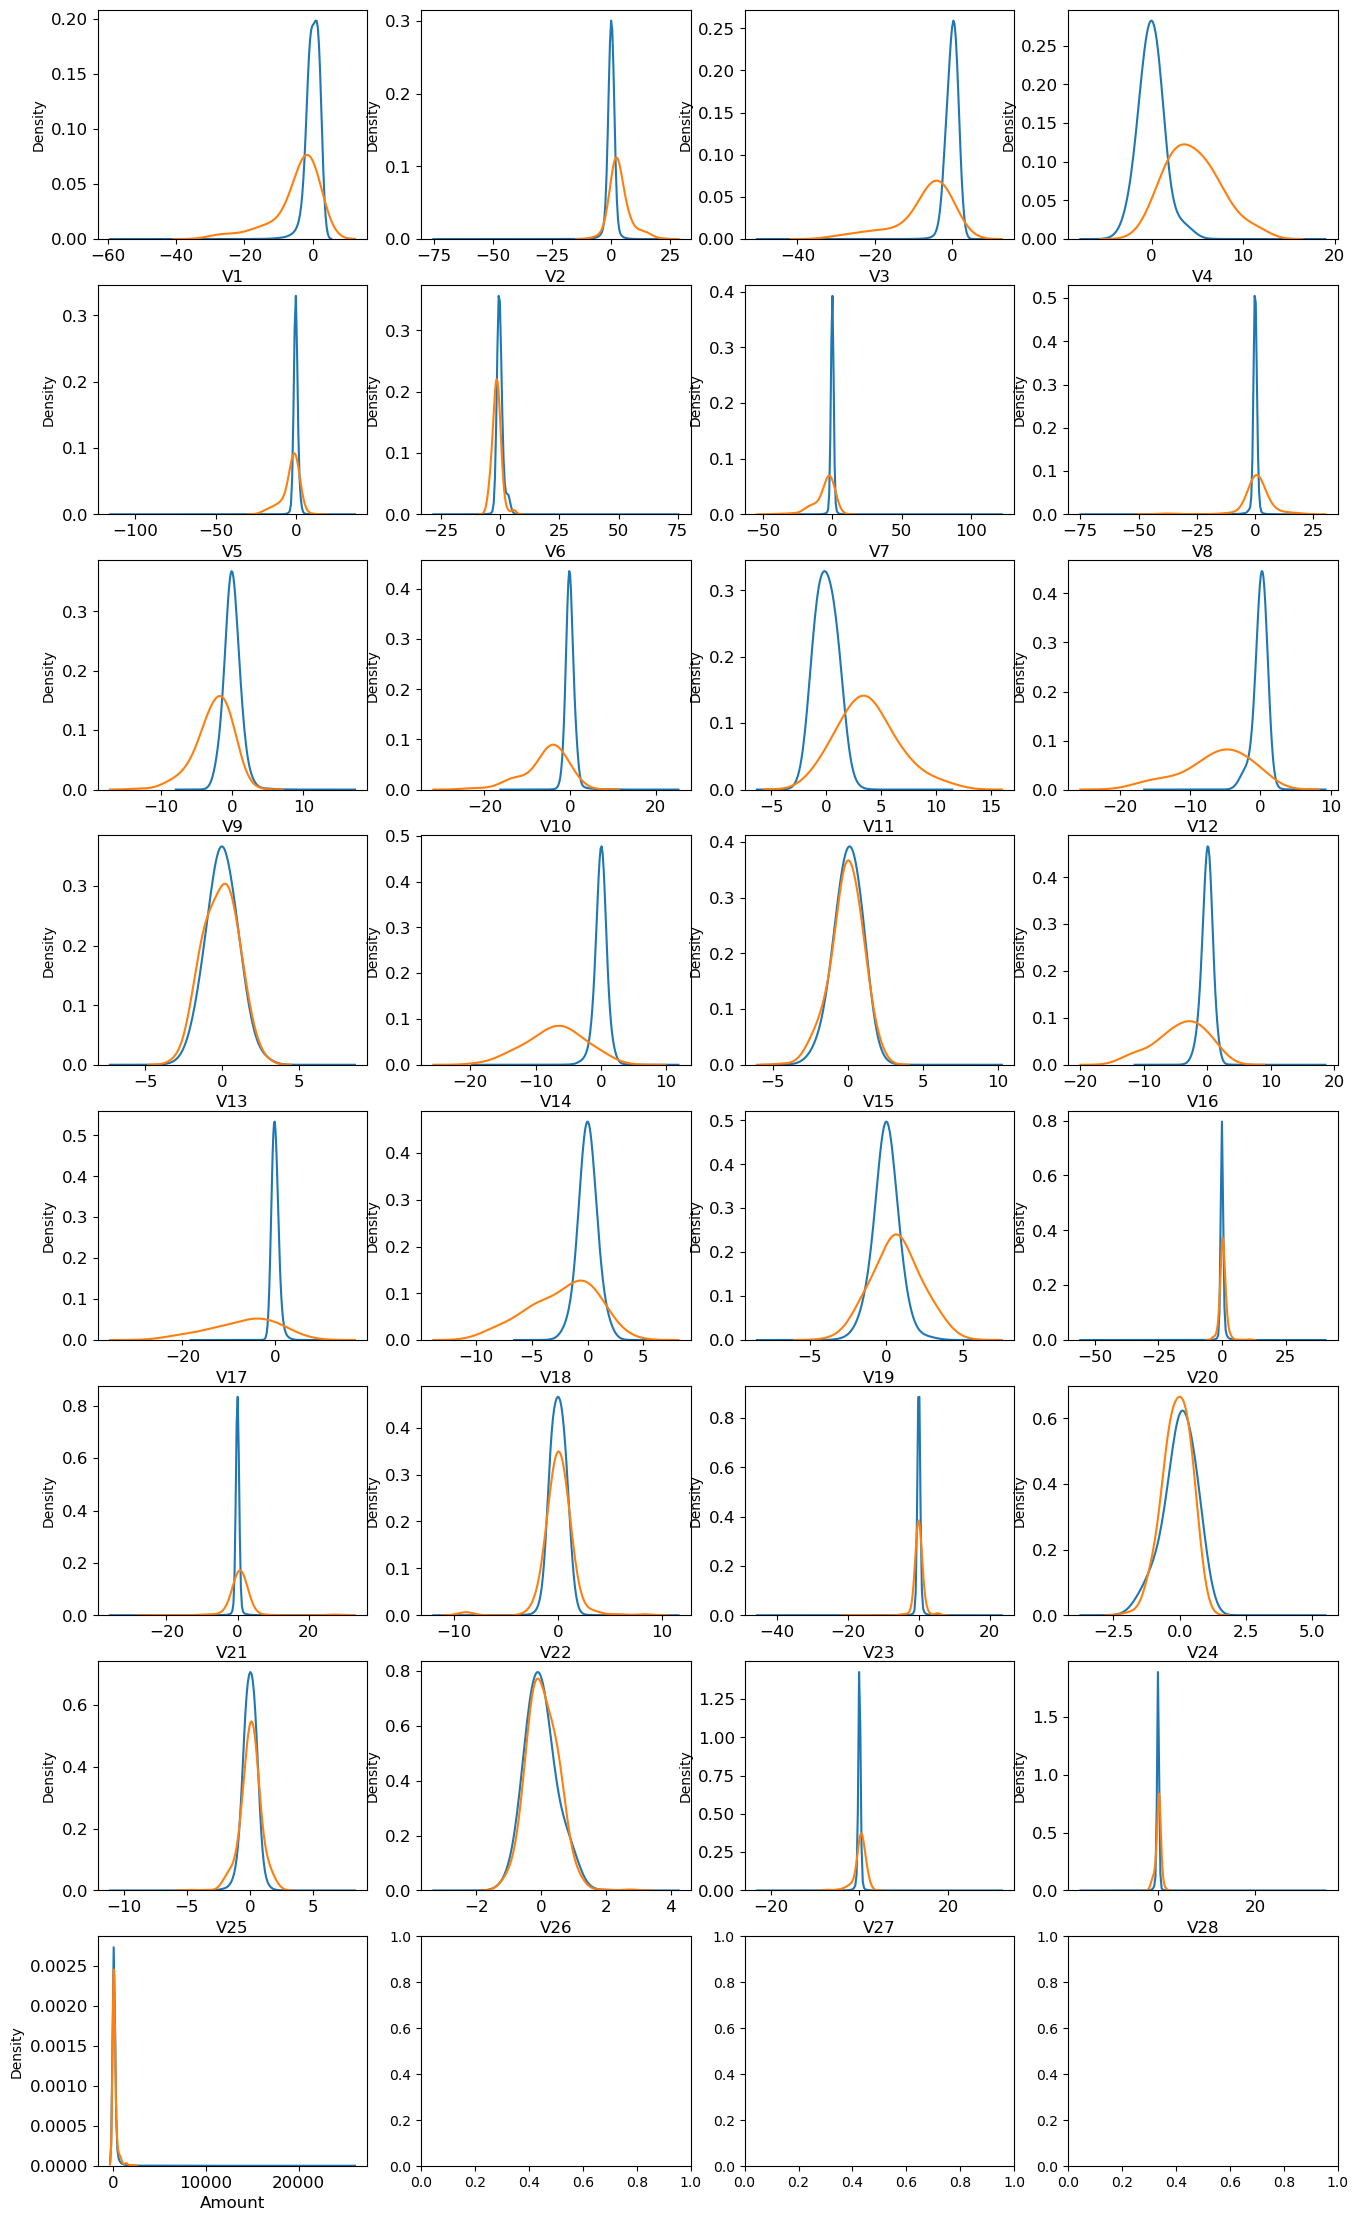

In [42]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

### Splitting the data into train & test data

In [46]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [48]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [50]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Feature Scaling using Standard Scaler

#### Feature scalling, we just need `Amount` features to scale as rest are fine due to those are scalled already by PCA transformation

In [54]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [56]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [58]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### Plotting the distribution of a variable to handle skewness

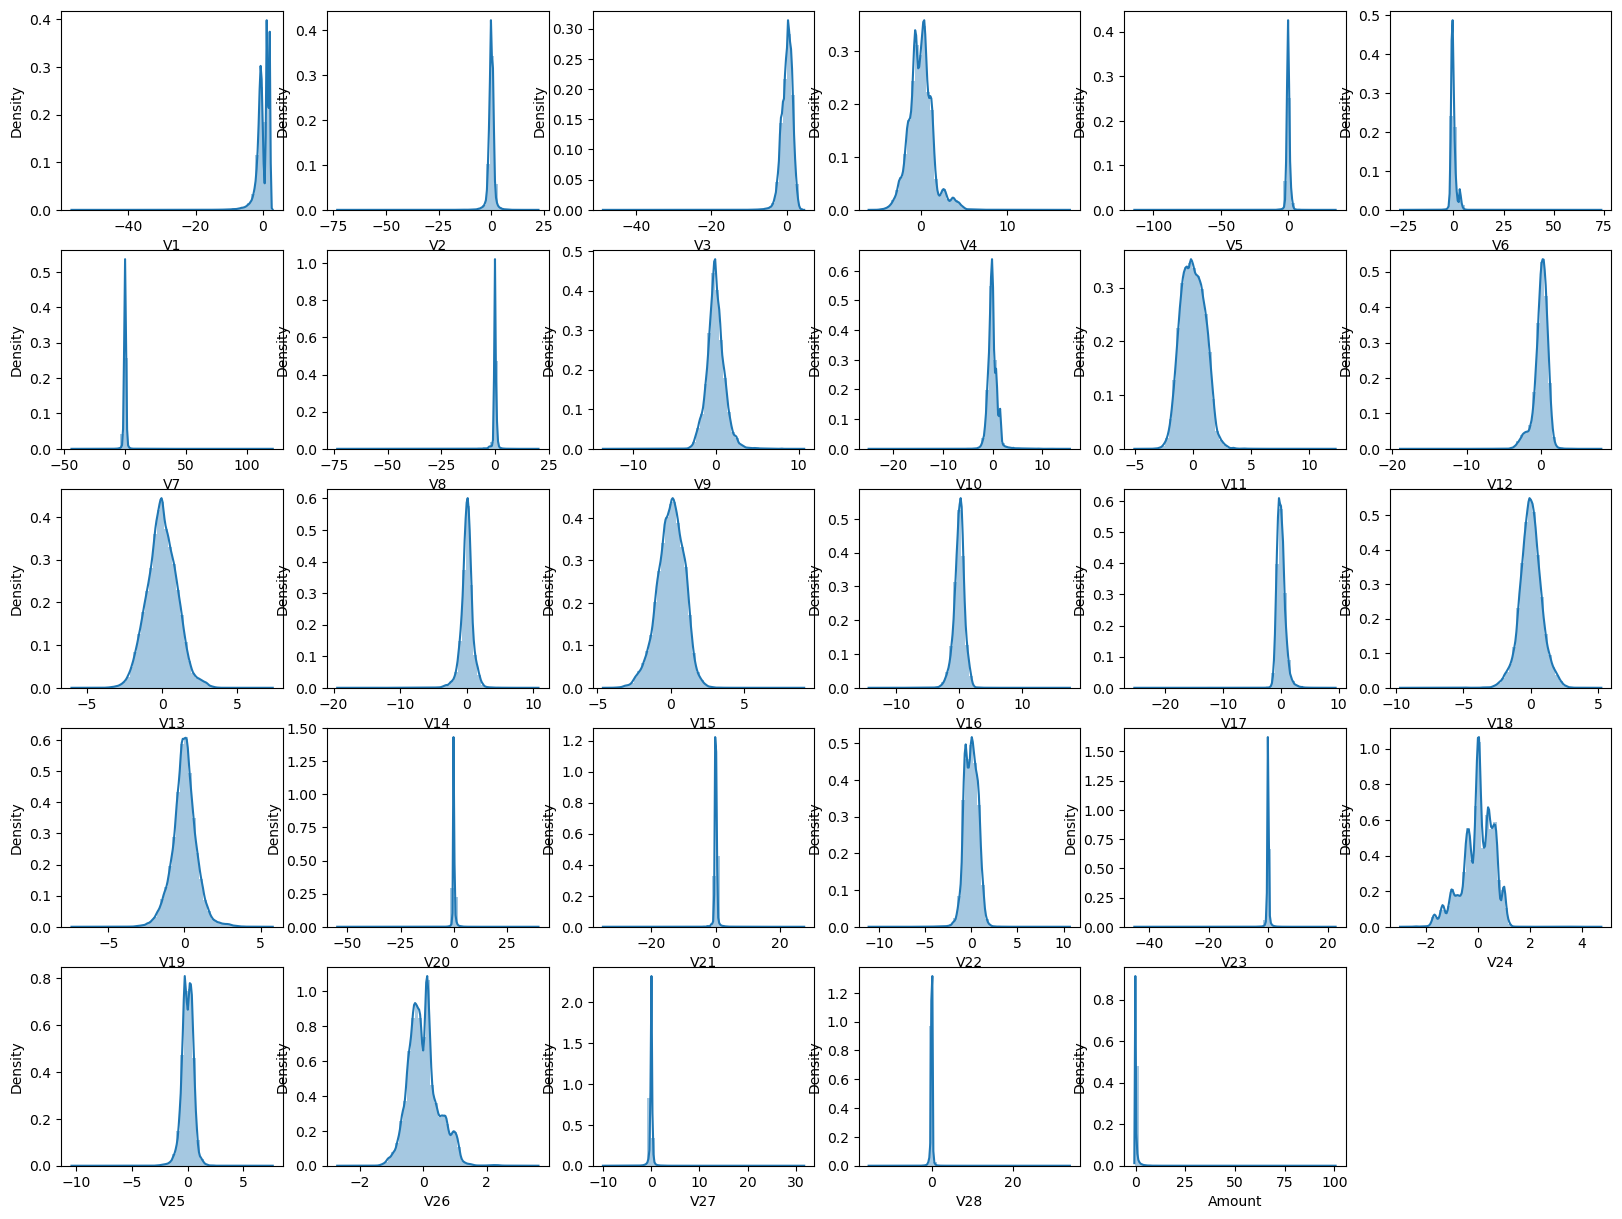

In [61]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [64]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [66]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### There is skewness present in the distribution of the above features:
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

In [69]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

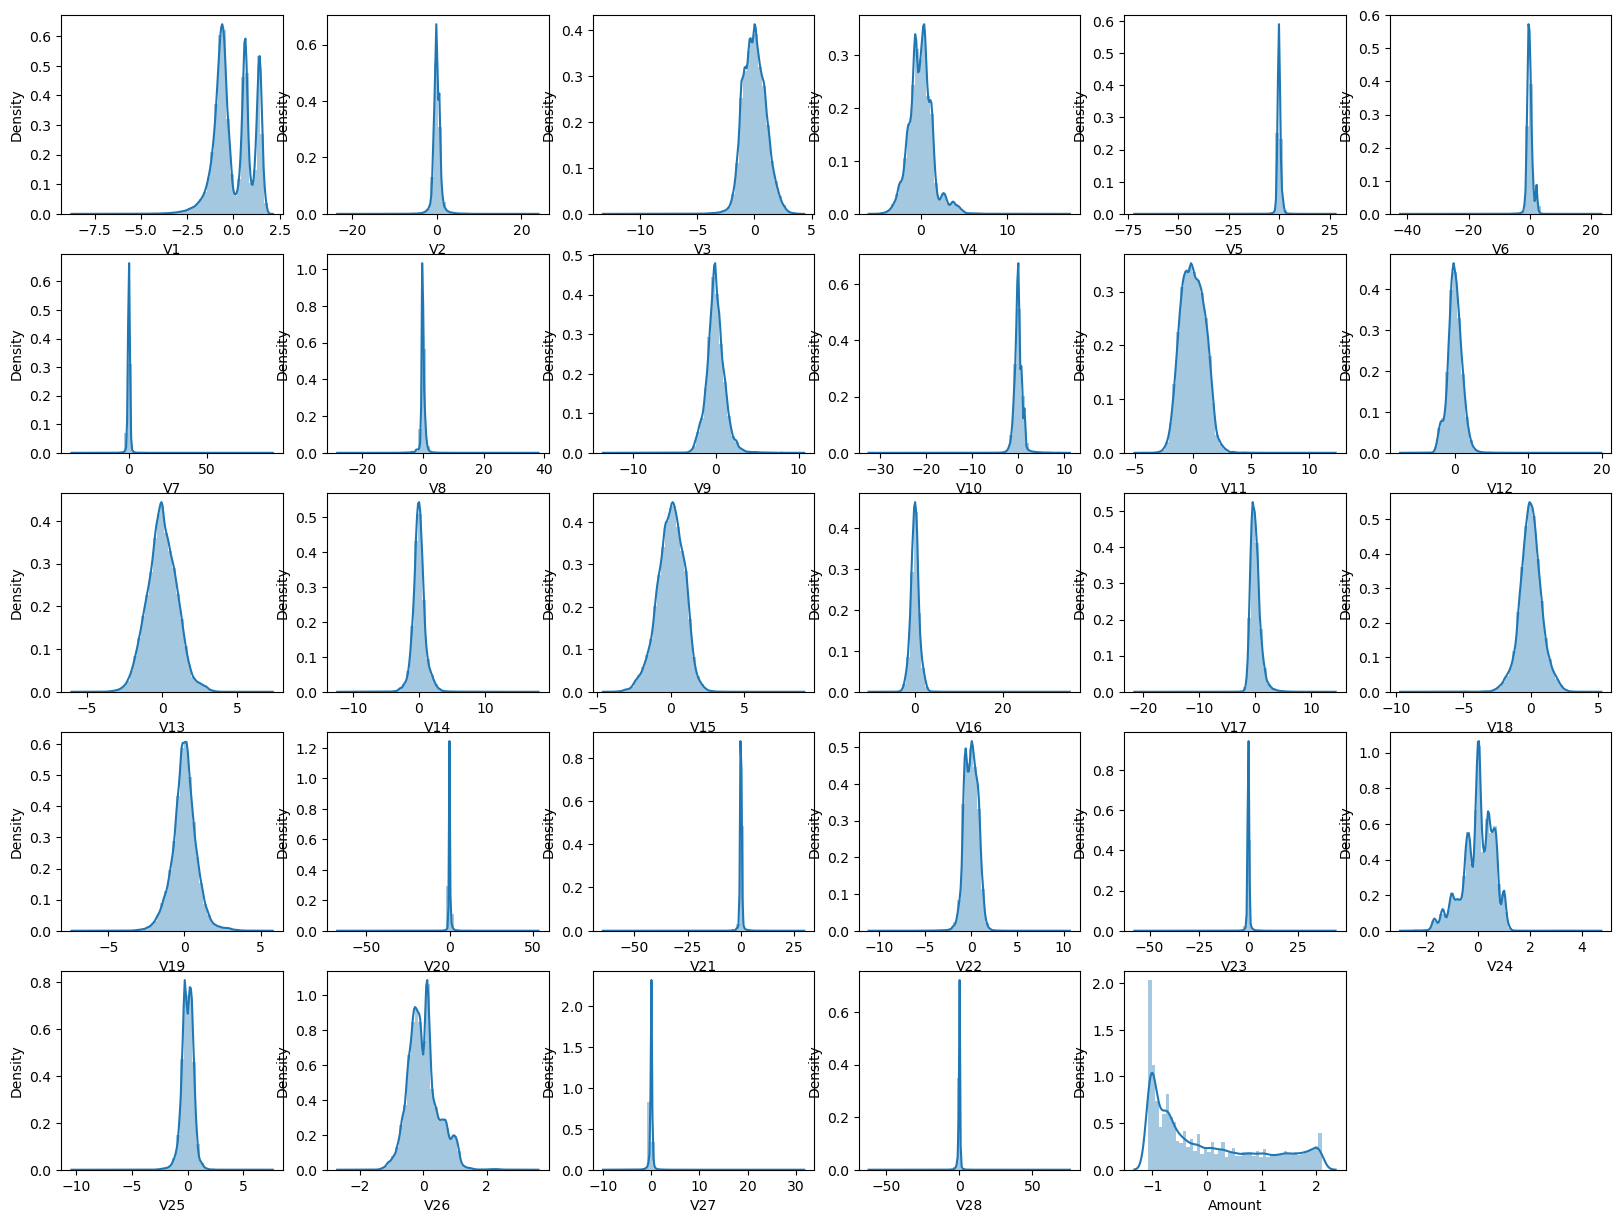

In [70]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building with imbalanced data
We will create models using the algorithms listed below, then compare them to see which model performs the best. We do not use SVM, RandomForest, or KNN when developing models because they are computationally demanding and require a lot of processing power, particularly for SVM and KNN. KNN algorithms compute the distance between each data point, and to get the closest neighbor, this computation is repeated for each data point. In cases where the data set is quite huge, this technique becomes highly costly computationally. We are omitting these models because we do not currently have these resources available.
- Logistic Regression
- Decision Tree
- XGBoost

#### Metric selection on imbalance data
For the purpose of evaluating the model, we will employ the ROC-AUC score as the assessment metric. Since there are very few fraud incidents overall and the data is very skewed, accuracy is not the appropriate statistic to assess the model.

In [74]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

### 1. Logistic Regression

In [77]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best ROC AUC score:  0.9814533001655027
Best hyperparameters:  {'C': 0.01}


In [79]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.244711,0.021448,0.060336,0.007493,0.001,{'C': 0.001},0.968946,0.988905,0.991605,0.974289,0.982930,0.981335,0.008584,2,0.986029,0.982271,0.980986,0.986133,0.981392,0.983362,0.002259
1,1.368128,0.119821,0.061376,0.011020,0.010,{'C': 0.01},0.966660,0.987834,0.991868,0.971808,0.989097,0.981453,0.010193,1,0.987070,0.981708,0.980443,0.986561,0.980840,0.983324,0.002884
2,1.351760,0.076113,0.061410,0.007574,0.100,{'C': 0.1},0.967083,0.983684,0.990282,0.966392,0.984831,0.978454,0.009826,3,0.984806,0.978714,0.978578,0.985010,0.979556,0.981333,0.002939
3,1.381028,0.112081,0.062696,0.012701,1.000,{'C': 1},0.967110,0.983119,0.989944,0.965358,0.984313,0.977969,0.009870,4,0.984310,0.978077,0.978235,0.984692,0.979131,0.980889,0.002974
4,1.381572,0.106108,0.051225,0.011686,10.000,{'C': 10},0.967116,0.983046,0.989904,0.965231,0.984253,0.977910,0.009877,5,0.984249,0.978002,0.978198,0.984655,0.979082,0.980837,0.002977
5,1.334041,0.101289,0.057297,0.007167,100.000,{'C': 100},0.967117,0.983038,0.989898,0.965219,0.984247,0.977904,0.009876,6,0.984242,0.977995,0.978194,0.984652,0.979077,0.980832,0.002977
6,1.335878,0.071803,0.037107,0.006736,1000.000,{'C': 1000},0.967117,0.983037,0.989897,0.965218,0.984246,0.977903,0.009876,7,0.984242,0.977994,0.978194,0.984652,0.979077,0.980832,0.002977


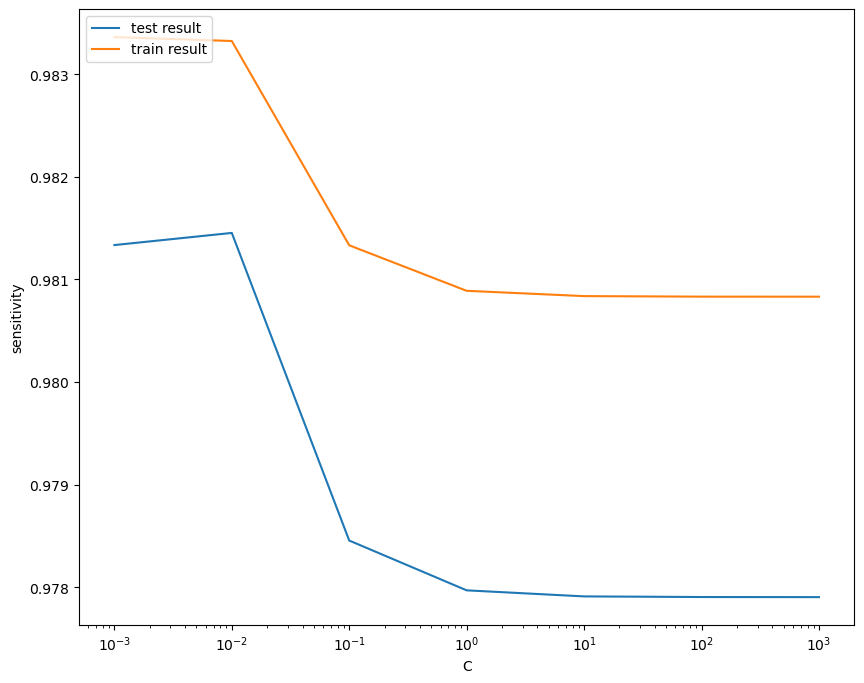

In [81]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [84]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Prediction and model evalution on the train set

In [87]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [89]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
def Scores(actual, pred, pred_proba):
    # Confusion matrix
    confusion = metrics.confusion_matrix(actual, pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy: ",metrics.accuracy_score(actual, pred))

    # Sensitivity
    print("Sensitivity: ",TP / float(TP+FN))

    # Specificity
    print("Specificity: ", TN / float(TN+FP))

    # F1 score
    print("F1-Score: ", f1_score(actual, pred))

    # classification_report
    print(classification_report(actual, pred))
    # roc_auc
    auc = metrics.roc_auc_score(actual, pred_proba)
    print("roc_auc train score: ", auc)
    return None

In [93]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

In [95]:
# Printing the scores
Scores(y_train,y_train_pred,y_train_pred_proba)

[[227424     27]
 [   148    246]]
Accuracy:  0.9992319339902126
Sensitivity:  0.6243654822335025
Specificity:  0.9998812931136817
F1-Score:  0.7376311844077961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score:  0.9827868654345298


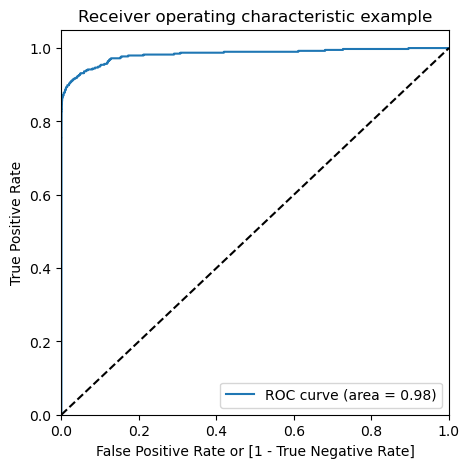

In [97]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [100]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)

In [102]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

In [104]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56855     9]
 [   43    55]]
Accuracy:  0.9990871107053826
Sensitivity:  0.5612244897959183
Specificity:  0.9998417276308385
F1-Score:  0.6790123456790124
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc train score:  0.9793648361145246


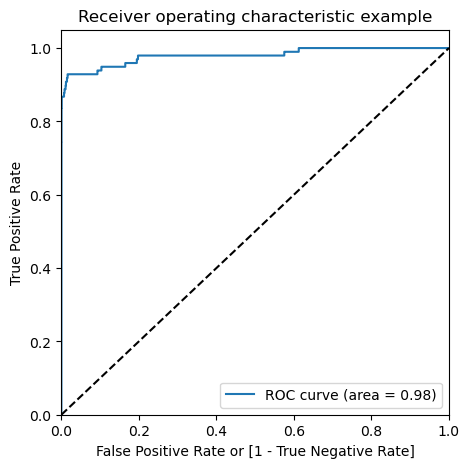

In [106]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see very good ROC on the test data set 0.98.

#### Model Summary


- Train set                       
  - Accuracy    :  99%                 
  - Sensitivity :  62%
  - Specifivty  :  99%
  - F1-Score    :  73%
  - ROC         :  98%

- Test set                       
  - Accuracy    :  99%                   
  - Sensitivity :  56%
  - Specifivty  :  99%
  - F1-Score    :  67%
  - ROC         :  98%

We could see Train set learning is almost similar like Test set however there still can be improved  

### 2. Decision Tree

In [111]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [113]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.964283,0.046852,0.050356,0.009096,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.919716,0.951702,0.928014,0.016998,6
1,6.039051,0.073049,0.058585,0.008608,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912639,0.919716,0.951706,0.928021,0.016996,5
2,5.944536,0.024464,0.044480,0.006209,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,5.954207,0.011386,0.053898,0.002798,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,11.977252,0.088205,0.038091,0.002528,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942324,0.923851,0.915743,0.927306,0.011123,7
5,11.957433,0.162344,0.031444,0.006916,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.927441,0.923845,0.915738,0.922341,0.004895,8
6,12.219328,0.340405,0.031997,0.007322,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948465,0.930668,0.908152,0.929095,0.016495,3
7,12.287548,0.148271,0.026873,0.000244,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948446,0.930666,0.908149,0.929087,0.016489,4


In [118]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9338362614319525
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [121]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Prediction on the train set

In [126]:
y_train_pred = dt_imb_model.predict(X_train)
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [128]:
# Printing the scores
Scores(y_train,y_train_pred,y_train_pred_proba)

[[227372     79]
 [   126    268]]
Accuracy:  0.999100265531392
Sensitivity:  0.6802030456852792
Specificity:  0.9996526724437351
F1-Score:  0.7233468286099866
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score:  0.9486790003545584


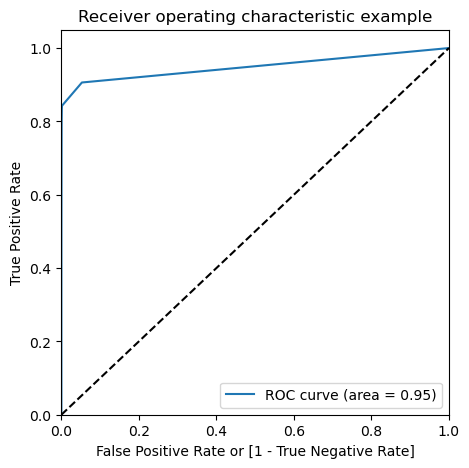

In [130]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [133]:
y_test_pred = dt_imb_model.predict(X_test)
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [135]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56839    25]
 [   29    69]]
Accuracy:  0.9990519995786665
Sensitivity:  0.7040816326530612
Specificity:  0.9995603545301069
F1-Score:  0.71875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc train score:  0.9550532491415248


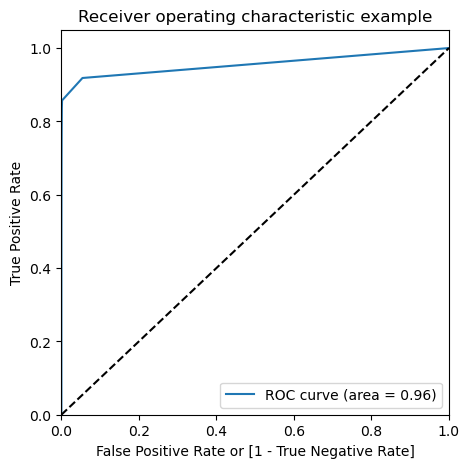

In [137]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set                       
  - Accuracy    :  99%                 
  - Sensitivity :  68%
  - Specifivty  :  99%
  - F1-Score    :  72%
  - ROC         :  95%

- Test set                       
  - Accuracy    :  99%                   
  - Sensitivity :  70%
  - Specifivty  :  99%
  - F1-Score    :  72%
  - ROC         :  96%

### 3. XGBoost

In [142]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 1.0]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'subsample': [0.3, 0.6, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'binary:logistic'


In [144]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.413820,0.415856,0.065848,0.000478,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.977013,0.973608,0.986888,0.979170,0.005632,11,0.998702,0.998406,0.998601,0.998570,0.000123
1,1.137170,0.013490,0.065344,0.001309,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.981744,0.981424,0.987003,0.983391,0.002558,1,0.998016,0.998695,0.998539,0.998417,0.000291
2,1.514392,0.032208,0.074543,0.006492,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.983155,0.976113,0.987360,0.982209,0.004640,3,0.998496,0.998814,0.998729,0.998680,0.000134
3,1.006457,0.121627,0.067185,0.003097,0.1,1.0,"{'learning_rate': 0.1, 'subsample': 1.0}",0.981999,0.976106,0.985861,0.981322,0.004011,7,0.998695,0.998676,0.998577,0.998649,0.000052
4,1.279651,0.147003,0.066526,0.000818,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968831,0.960607,0.986866,0.972101,0.010967,16,0.999832,0.999843,0.999686,0.999787,0.000071
5,1.287281,0.211320,0.067753,0.005321,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975385,0.983747,0.987352,0.982161,0.005013,4,0.999883,0.999946,0.999879,0.999902,0.000031
6,1.467809,0.078937,0.065008,0.000817,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980065,0.976040,0.988241,0.981449,0.005076,6,0.999931,0.999922,0.999836,0.999896,0.000042
7,0.943264,0.046832,0.066670,0.000474,0.2,1.0,"{'learning_rate': 0.2, 'subsample': 1.0}",0.982600,0.970404,0.990255,0.981086,0.008174,8,0.999893,0.999867,0.999724,0.999828,0.000074
8,1.163824,0.028464,0.065902,0.001449,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",0.968786,0.971730,0.990640,0.977052,0.009683,13,0.999880,0.999939,0.999918,0.999912,0.000024
9,1.444620,0.216720,0.071910,0.005876,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.977957,0.969496,0.986138,0.977864,0.006794,12,0.999997,0.999996,0.999989,0.999994,0.000004


In [146]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9833905376225943
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [148]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.1, 'subsample': 0.6}

#### XGBoost model with optimal hyperparameter

In [151]:
# Printing best parameters
params = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Model evaluation on train set

In [154]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)
# Predicted probability
y_train_pred_proba = xgb_imb_model.predict_proba(X_train)[:,1]

In [156]:
# Printing the scores
Scores(y_train,y_train_pred,y_train_pred_proba)

[[227451      0]
 [     0    394]]
Accuracy:  1.0
Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score:  1.0


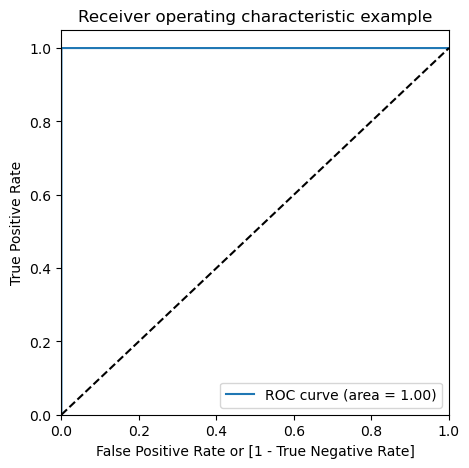

In [158]:

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [161]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [163]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56862     2]
 [   20    78]]
Accuracy:  0.9996137776061234
Sensitivity:  0.7959183673469388
Specificity:  0.9999648283624085
F1-Score:  0.8764044943820225
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc train score:  0.9844539567374502


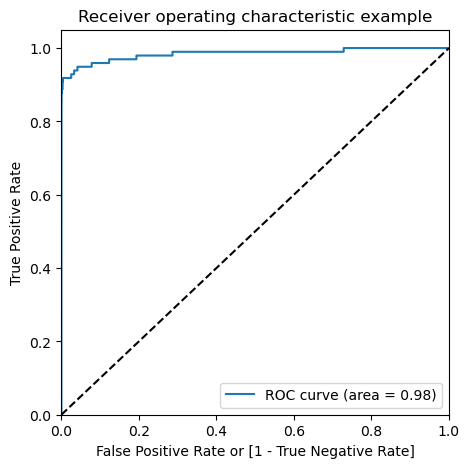

In [165]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set                       
  - Accuracy    :  100%                 
  - Sensitivity :  100%
  - Specifivty  :  100%
  - F1-Score    :  100%
  - ROC         :  100%

- Test set                       
  - Accuracy    :  99%                   
  - Sensitivity :  80%
  - Specifivty  :  99%
  - F1-Score    :  88%
  - ROC         :  98%

**Out of these three models, the XGBoost model performs well on unbalanced data. With train data, the ROC-AUC score is 100%, while with test data, it is 98%.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


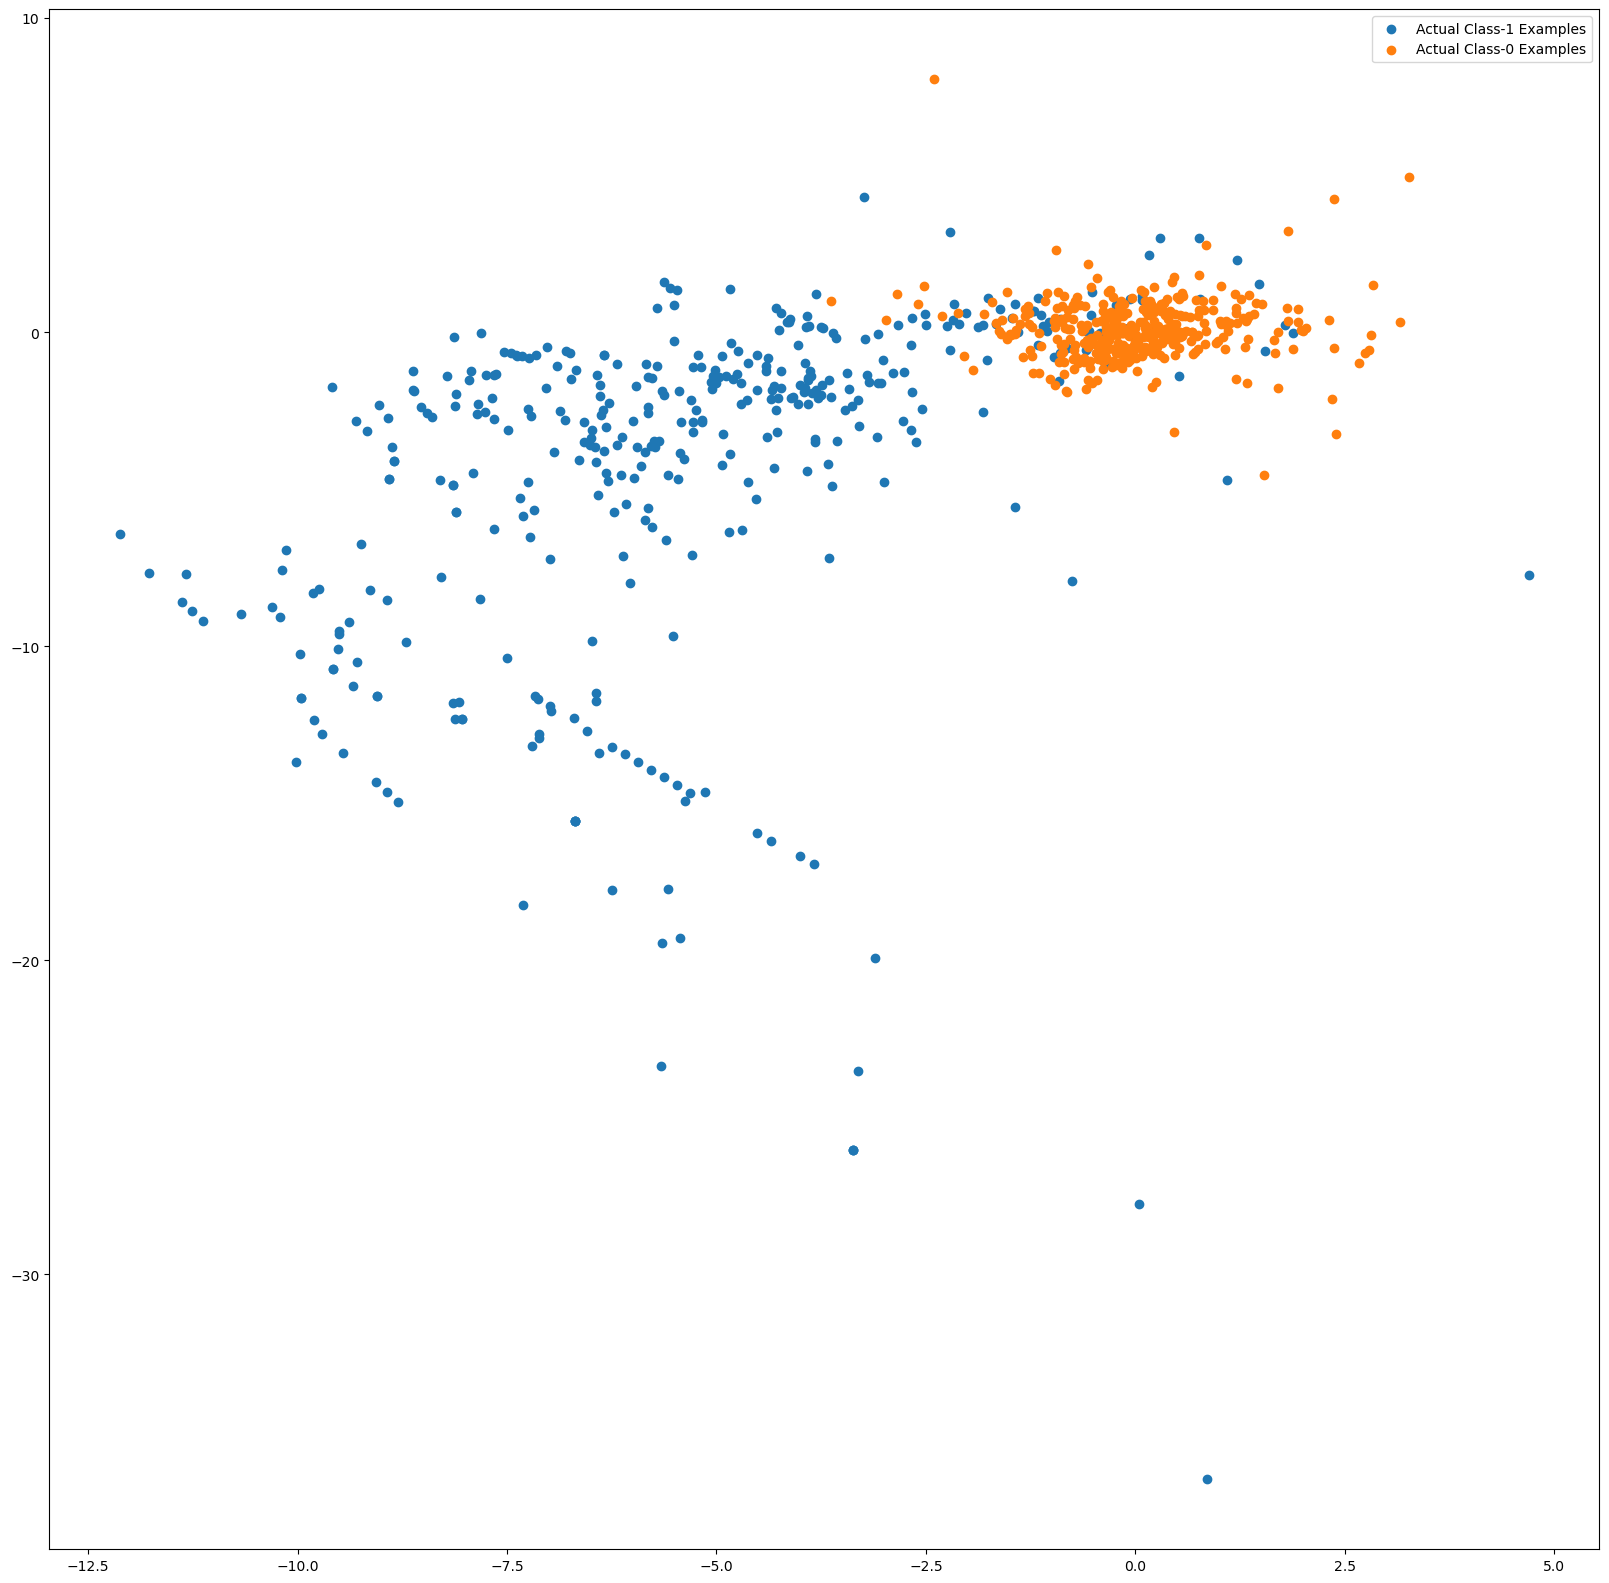

In [170]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [173]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81609064


We can see that the threshold is 0.82, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Model building with balancing Classes

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [178]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [180]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regression with Random Oversampling

In [183]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best ROC AUC score:  0.9871954845016842
Best hyperparameters:  {'C': 1000}


In [185]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.696780,0.047184,0.038097,0.000509,0.001,{'C': 0.001},0.985179,0.986406,0.986642,0.986437,0.986687,0.986270,0.000557,7,0.986540,0.986261,0.986211,0.986220,0.986234,0.986293,0.000125
1,0.898718,0.016940,0.042472,0.010404,0.010,{'C': 0.01},0.986017,0.987165,0.987349,0.987177,0.987494,0.987040,0.000526,6,0.987309,0.987042,0.986973,0.986988,0.987009,0.987064,0.000124
2,0.962091,0.065362,0.042929,0.010030,0.100,{'C': 0.1},0.986180,0.987294,0.987488,0.987308,0.987633,0.987181,0.000516,5,0.987451,0.987173,0.987106,0.987122,0.987150,0.987200,0.000127
3,0.948644,0.057689,0.043181,0.008994,1.000,{'C': 1},0.986198,0.987315,0.987493,0.987324,0.987642,0.987194,0.000513,3,0.987466,0.987196,0.987115,0.987138,0.987156,0.987214,0.000128
4,0.972536,0.072306,0.042262,0.012626,10.000,{'C': 10},0.986195,0.987318,0.987494,0.987312,0.987653,0.987194,0.000516,4,0.987462,0.987198,0.987117,0.987127,0.987164,0.987214,0.000127
5,0.969486,0.071395,0.037896,0.000478,100.000,{'C': 100},0.986196,0.987317,0.987494,0.987314,0.987655,0.987195,0.000516,2,0.987463,0.987198,0.987117,0.987129,0.987165,0.987215,0.000127
6,0.965080,0.074018,0.044246,0.009226,1000.000,{'C': 1000},0.986196,0.987318,0.987494,0.987314,0.987656,0.987195,0.000516,1,0.987463,0.987198,0.987117,0.987130,0.987166,0.987215,0.000127


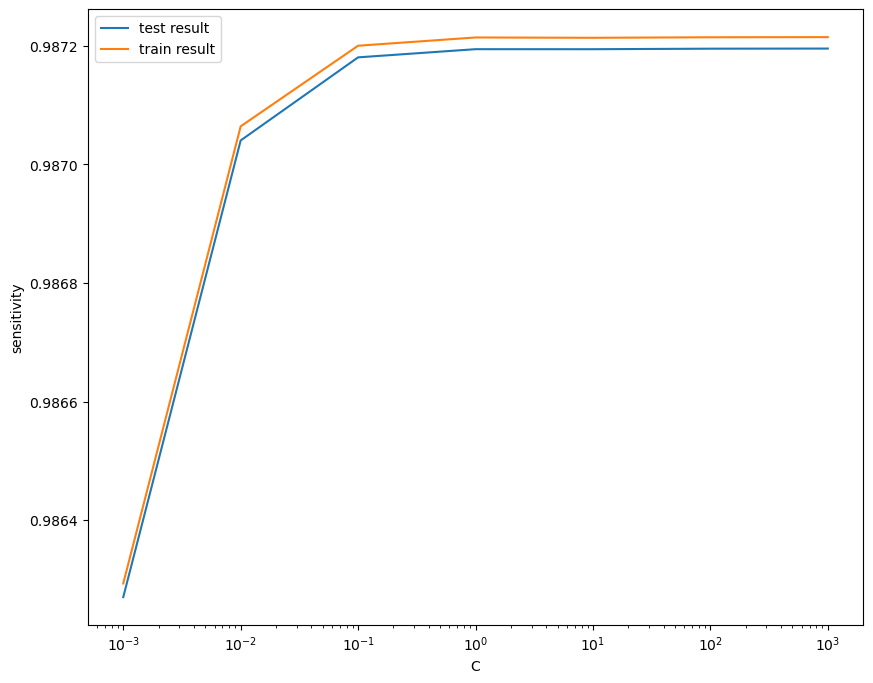

In [187]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with hyperparameter tuning

In [190]:
model_cv.best_params_

{'C': 1000}

In [192]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [195]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [197]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]

In [199]:
# Printing the scores
Scores(y_over,y_train_pred,y_train_pred_proba)

[[221388   6063]
 [ 18860 208591]]
Accuracy:  0.9452123754127263
Sensitivity:  0.9170810416309447
Specificity:  0.9733437091945079
F1-Score:  0.9436265140634013
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902

roc_auc train score:  0.9872055582396408


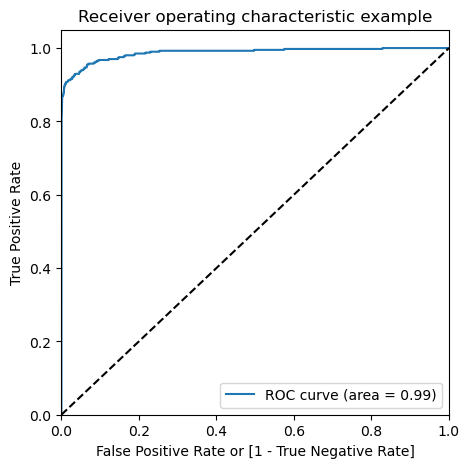

In [201]:
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [204]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

In [206]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

In [208]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[55339  1525]
 [    8    90]]
Accuracy:  0.9730873213721428
Sensitivity:  0.9183673469387755
Specificity:  0.9731816263365223
F1-Score:  0.10507880910683012
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

roc_auc train score:  0.9800578609327806


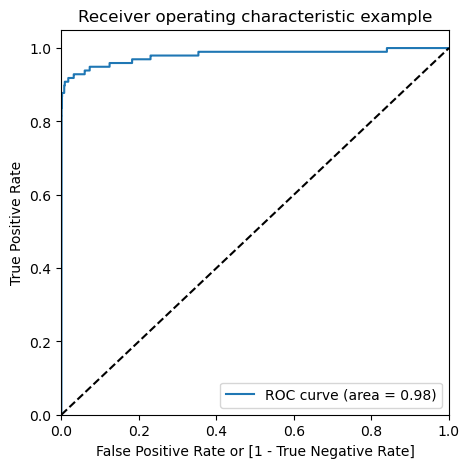

In [210]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  94%                
  - Sensitivity :  91%
  - Specifivty  :  97%
  - F1-Score    :  94%
  - ROC         :  99%

- Test Set                       
  - Accuracy    :  97%                  
  - Sensitivity :  91%
  - Specifivty  :  97%
  - F1-Score    :  10.5%
  - ROC         :  98%

### 2. Decision Tree with Random Oversampling

In [214]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [216]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9991914802558833
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Decision Tree with optimal hyperparameters

In [219]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,100
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Model evatuation on train data

In [222]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)

In [224]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]

In [226]:
# Printing the scores
Scores(y_over,y_train_pred,y_train_pred_proba)

[[224694   2757]
 [     0 227451]]
Accuracy:  0.9939393539707454
Sensitivity:  1.0
Specificity:  0.9878787079414907
F1-Score:  0.9939758641259103
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902

roc_auc train score:  0.9995809805186181


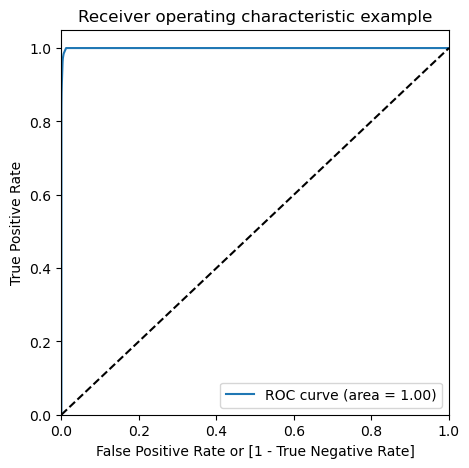

In [228]:
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [231]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)

In [233]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]

In [235]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56168   696]
 [   18    80]]
Accuracy:  0.9874653277623678
Sensitivity:  0.8163265306122449
Specificity:  0.9877602701181767
F1-Score:  0.18306636155606407
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.82      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.90      0.59     56962
weighted avg       1.00      0.99      0.99     56962

roc_auc train score:  0.906720241205655


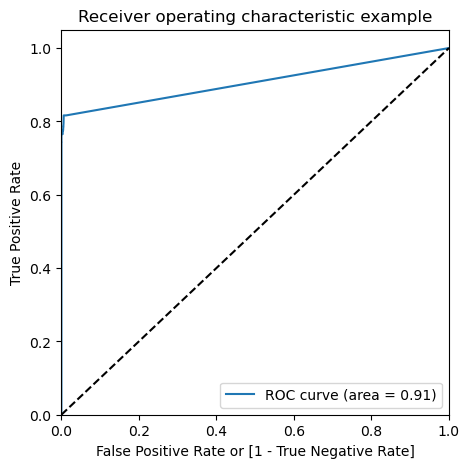

In [237]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  99%                 
  - Sensitivity :  100%
  - Specifivty  :  99%
  - F1-Score    :  99%
  - ROC         :  100%

- Test Set                       
  - Accuracy    :  99%                   
  - Sensitivity :  82%
  - Specifivty  :  99%
  - F1-Score    :  18%
  - ROC         :  91%

### 3. XGBoost with Random Oversampling

In [243]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 1.0]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'subsample': [0.3, 0.6, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'binary:logistic'


In [245]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.630413,0.152049,0.151239,0.005501,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999525,0.999548,0.999547,0.999540,0.000011,13,0.999577,0.999526,0.999559,0.999554,2.109576e-05
1,3.550080,0.062738,0.148137,0.007492,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999500,0.999554,0.999492,0.999515,0.000027,15,0.999552,0.999528,0.999506,0.999529,1.891388e-05
2,3.174328,0.135143,0.129830,0.005764,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.999486,0.999550,0.999533,0.999523,0.000027,14,0.999538,0.999522,0.999548,0.999536,1.060414e-05
3,2.295700,0.188817,0.130299,0.011502,0.1,1.0,"{'learning_rate': 0.1, 'subsample': 1.0}",0.999485,0.999539,0.999508,0.999511,0.000022,16,0.999537,0.999509,0.999525,0.999524,1.158869e-05
4,3.301104,0.089678,0.143419,0.008234,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999851,0.999863,0.999870,0.999861,0.000008,9,0.999866,0.999880,0.999880,0.999875,6.780986e-06
5,3.030065,0.050364,0.128186,0.011197,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999863,0.999856,0.999858,0.999859,0.000003,10,0.999874,0.999867,0.999872,0.999871,3.230846e-06
6,2.897015,0.064476,0.138511,0.006779,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999866,0.999852,0.999856,0.999858,0.000006,11,0.999868,0.999868,0.999866,0.999867,7.837763e-07
7,2.146064,0.068604,0.138163,0.011063,0.2,1.0,"{'learning_rate': 0.2, 'subsample': 1.0}",0.999851,0.999853,0.999858,0.999854,0.000003,12,0.999855,0.999871,0.999881,0.999869,1.064527e-05
8,2.915126,0.045789,0.133306,0.006075,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",0.999937,0.999937,0.999946,0.999940,0.000005,5,0.999947,0.999952,0.999967,0.999955,8.237730e-06
9,3.027398,0.052794,0.137029,0.010476,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.999941,0.999942,0.999926,0.999936,0.000007,6,0.999946,0.999954,0.999953,0.999951,3.594501e-06


In [247]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999791023332776
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [249]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

#### XGBoost with optimal hyperparameter

In [252]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Model evaluation on train data

In [255]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

In [257]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

In [259]:
# Printing the scores
Scores(y_over,y_train_pred,y_train_pred_proba)

[[227451      0]
 [     0 227451]]
Accuracy:  1.0
Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

roc_auc train score:  1.0


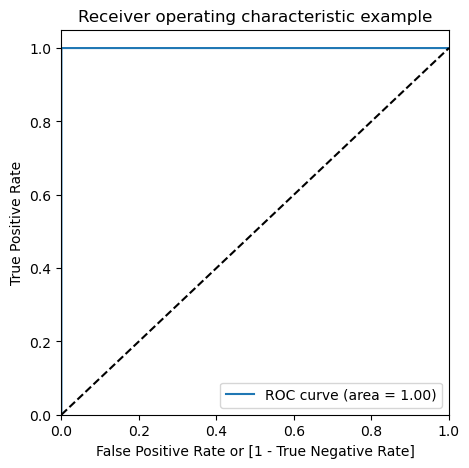

In [261]:
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [264]:
# Predictions on the test set
y_test_pred = xgb_over_model.predict(X_test)

In [266]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

In [268]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56860     4]
 [   17    81]]
Accuracy:  0.9996313331694814
Sensitivity:  0.826530612244898
Specificity:  0.9999296567248172
F1-Score:  0.8852459016393442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc train score:  0.978845516118659


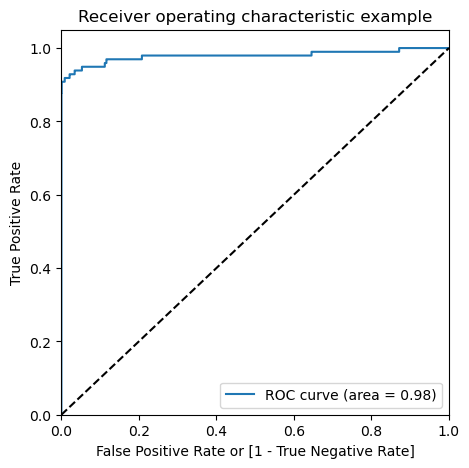

In [270]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  100%                 
  - Sensitivity :  100%
  - Specifivty  :  100%
  - F1-Score    :  100%
  - ROC         :  100%

- Test Set                       
  - Accuracy    :  99%                   
  - Sensitivity :  82%
  - Specifivty  :  99%
  - F1-Score    :  88%
  - ROC         :  98%

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

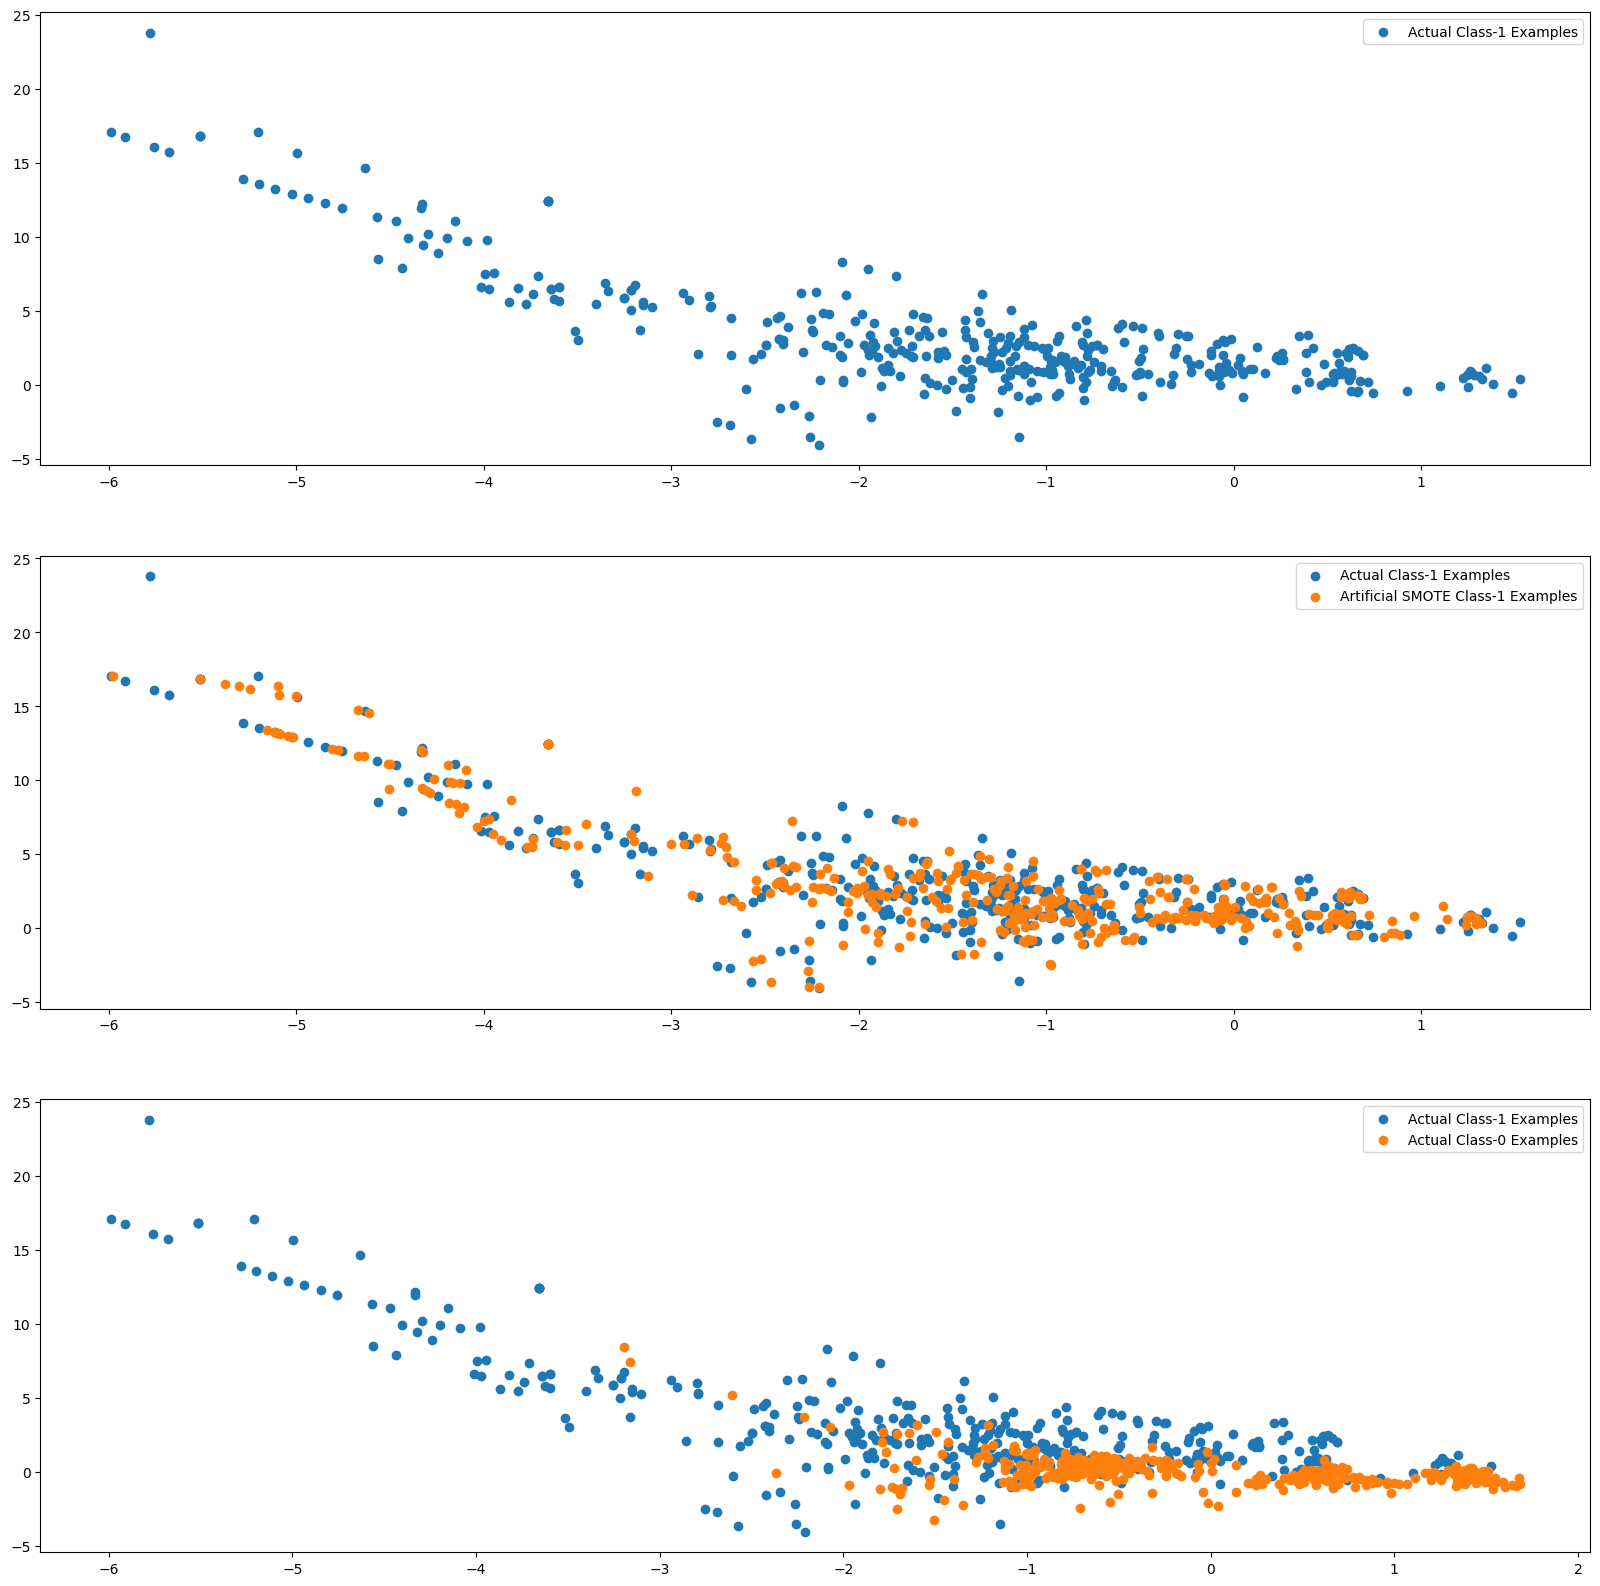

In [275]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with SMOTE

In [278]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best ROC AUC score:  0.9889850567288244
Best hyperparameters:  {'C': 1000}


In [280]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.681022,0.015431,0.042416,0.004666,0.001,{'C': 0.001},0.988029,0.988539,0.988470,0.988093,0.988187,0.988264,0.000204,7,0.988365,0.988178,0.988201,0.988313,0.988335,0.988278,0.000075
1,0.894774,0.032388,0.038762,0.001030,0.010,{'C': 0.01},0.988651,0.989114,0.988999,0.988700,0.988880,0.988869,0.000175,6,0.988979,0.988781,0.988791,0.988910,0.988954,0.988883,0.000082
2,0.968831,0.056695,0.046623,0.012047,0.100,{'C': 0.1},0.988755,0.989218,0.989092,0.988807,0.988990,0.988973,0.000173,5,0.989080,0.988893,0.988891,0.989010,0.989057,0.988986,0.000080
3,1.016591,0.040266,0.039482,0.001133,1.000,{'C': 1},0.988766,0.989230,0.989103,0.988819,0.989004,0.988984,0.000173,4,0.989090,0.988905,0.988903,0.989021,0.989071,0.988998,0.000080
4,1.013695,0.044724,0.049093,0.012340,10.000,{'C': 10},0.988767,0.989231,0.989101,0.988820,0.989004,0.988985,0.000173,3,0.989091,0.988906,0.988902,0.989022,0.989071,0.988998,0.000080
5,1.045207,0.047832,0.042747,0.004242,100.000,{'C': 100},0.988767,0.989231,0.989103,0.988820,0.989004,0.988985,0.000173,2,0.989091,0.988906,0.988904,0.989022,0.989071,0.988999,0.000080
6,1.052492,0.044886,0.049735,0.016665,1000.000,{'C': 1000},0.988767,0.989231,0.989104,0.988820,0.989004,0.988985,0.000173,1,0.989091,0.988906,0.988904,0.989022,0.989071,0.988999,0.000080


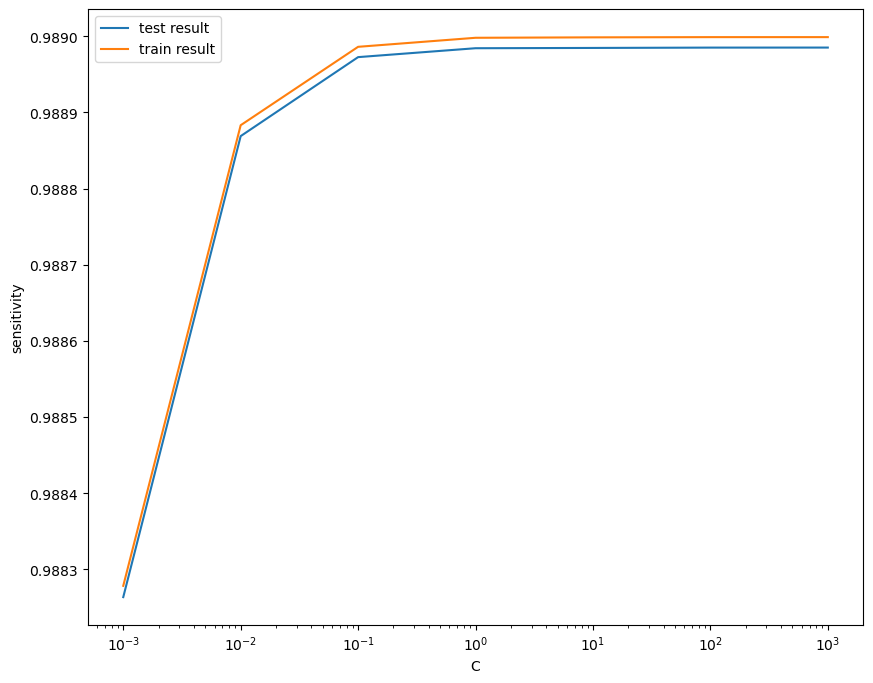

In [282]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [285]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [287]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=1000)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Evaluating the model on train data

In [290]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)

In [292]:
# Predicted probability
y_train_pred_proba = logreg_smote_model.predict_proba(X_train_smote)[:,1]

In [294]:
# Printing the scores
Scores(y_train_smote,y_train_pred,y_train_pred_proba)

[[221035   6416]
 [ 19131 208320]]
Accuracy:  0.9438406513930473
Sensitivity:  0.9158895762164159
Specificity:  0.9717917265696787
F1-Score:  0.9422258003966648
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902

roc_auc train score:  0.9889954073764904


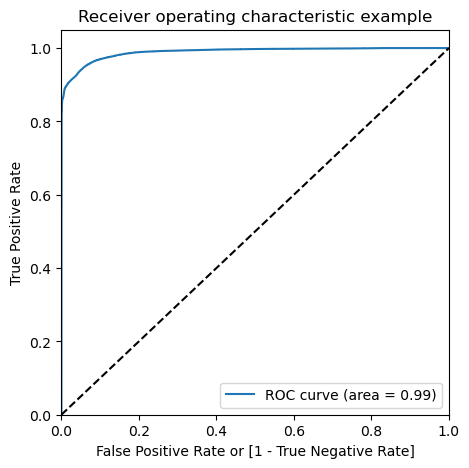

In [296]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating on test data

In [299]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)

In [301]:
# Predicted probability
y_test_pred_proba = logreg_smote_model.predict_proba(X_test)[:,1]

In [303]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[55211  1653]
 [    8    90]]
Accuracy:  0.9708402092623152
Sensitivity:  0.9183673469387755
Specificity:  0.9709306415306697
F1-Score:  0.0977729494839761
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

roc_auc train score:  0.9779981667681141


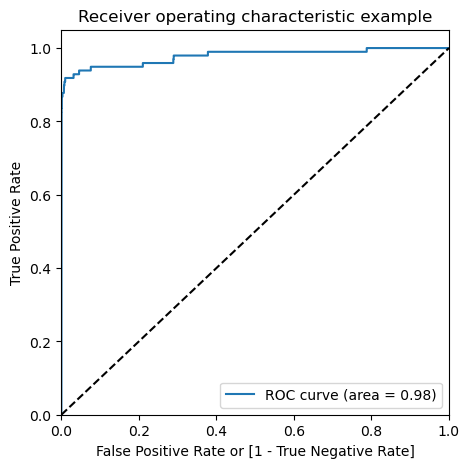

In [307]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  94%                 
  - Sensitivity :  92%
  - Specifivty  :  97%
  - F1-Score    :  94%
  - ROC         :  99%

- Test Set                       
  - Accuracy    :  97%                   
  - Sensitivity :  92%
  - Specifivty  :  97%
  - F1-Score    :  9.7%
  - ROC         :  98%

### 2. Decision Tree on balanced data with SMOTE

In [311]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [313]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9976125480012552
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [316]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [318]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,50
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Evaluating the model on train data

In [321]:
# Predictions on the train set
y_train_pred = dt_smote_model.predict(X_train_smote)

In [323]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]

In [325]:
# Printing the scores
Scores(y_train_smote,y_train_pred,y_train_pred_proba)

[[224177   3274]
 [  3056 224395]]
Accuracy:  0.9860849149926797
Sensitivity:  0.9865641390892984
Specificity:  0.9856056908960611
F1-Score:  0.9860915802425734
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902

roc_auc train score:  0.998221605322267


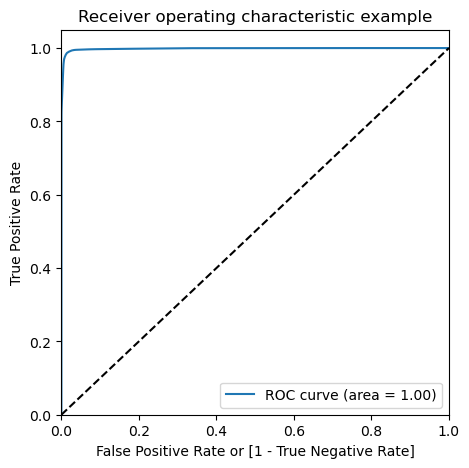

In [327]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [330]:
# Evaluating model on the test data
y_test_pred = dt_smote_model.predict(X_test)

In [332]:
# Predicted probability
y_test_pred_proba = dt_smote_model.predict_proba(X_test)[:,1]

In [334]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[55982   882]
 [   15    83]]
Accuracy:  0.9842526596678487
Sensitivity:  0.8469387755102041
Specificity:  0.9844893078221723
F1-Score:  0.1561618062088429
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962

roc_auc train score:  0.9169539316148517


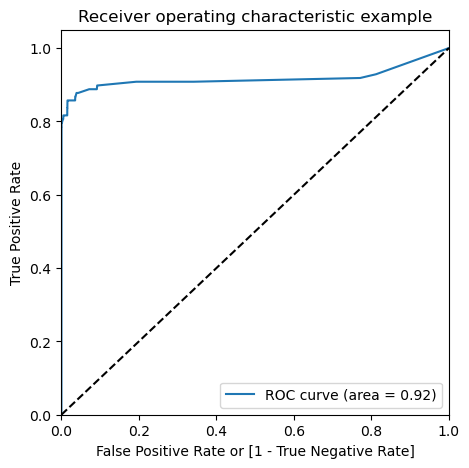

In [336]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train data                       
  - Accuracy    :  99%                
  - Sensitivity :  99%
  - Specifivty  :  99%
  - F1-Score    :  99%
  - ROC         :  100%

- Test data                       
  - Accuracy    :  98%                  
  - Sensitivity :  84%
  - Specifivty  :  98%
  - F1-Score    :  15%
  - ROC         :  92%

### 3. XGBoost on balanced data with SMOTE

In [340]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 1.0]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'subsample': [0.3, 0.6, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'binary:logistic'


In [342]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.001701,0.250757,0.106115,0.006833,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.998481,0.998625,0.998378,0.998495,0.000101,13,0.998562,0.998566,0.998496,0.998541,0.000032
1,1.880501,0.063624,0.096623,0.002532,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.998429,0.998556,0.998333,0.998439,0.000091,14,0.998510,0.998505,0.998434,0.998483,0.000034
2,2.178742,0.222778,0.110184,0.001698,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.998378,0.998489,0.998309,0.998392,0.000074,15,0.998466,0.998451,0.998417,0.998445,0.000021
3,1.579808,0.124813,0.106245,0.008819,0.1,1.0,"{'learning_rate': 0.1, 'subsample': 1.0}",0.998354,0.998470,0.998292,0.998372,0.000074,16,0.998445,0.998431,0.998409,0.998428,0.000015
4,2.031467,0.267132,0.099349,0.001548,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999511,0.999556,0.999494,0.999520,0.000026,10,0.999570,0.999553,0.999534,0.999552,0.000015
5,2.261669,0.262985,0.106242,0.009544,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999512,0.999544,0.999543,0.999533,0.000015,9,0.999577,0.999548,0.999580,0.999569,0.000014
6,2.012096,0.086295,0.107684,0.006118,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999495,0.999567,0.999483,0.999515,0.000037,11,0.999561,0.999567,0.999531,0.999553,0.000016
7,1.686253,0.194167,0.108183,0.010213,0.2,1.0,"{'learning_rate': 0.2, 'subsample': 1.0}",0.999444,0.999513,0.999513,0.999490,0.000032,12,0.999518,0.999519,0.999556,0.999531,0.000018
8,1.884311,0.029389,0.097519,0.004082,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",0.999776,0.999798,0.999787,0.999787,0.000009,6,0.999806,0.999815,0.999811,0.999811,0.000004
9,2.290493,0.297596,0.099184,0.004107,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.999754,0.999809,0.999761,0.999775,0.000024,8,0.999810,0.999818,0.999800,0.999809,0.000008


In [344]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999369540498377
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [347]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 1.0}

In [349]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':1.0,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Evaluating the model on the train data

In [466]:
# Predictions on the train set
y_train_pred = xgb_smote_model.predict(X_train_smote)

In [468]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]

In [470]:
# Printing the scores
Scores(y_train_smote,y_train_pred,y_train_pred_proba)

[[227445      6]
 [     0 227451]]
Accuracy:  0.9999868103459646
Sensitivity:  1.0
Specificity:  0.9999736206919293
F1-Score:  0.9999868105199293
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

roc_auc train score:  0.9999999999033518


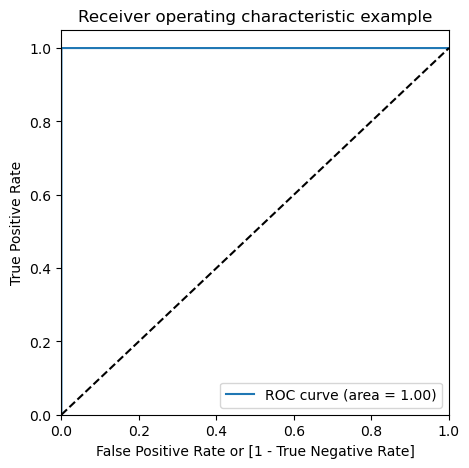

In [472]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [475]:
# Predictions on the test set
y_test_pred = xgb_smote_model.predict(X_test)

In [477]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]

In [479]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56844    20]
 [   12    86]]
Accuracy:  0.9994382219725431
Sensitivity:  0.8775510204081632
Specificity:  0.9996482836240855
F1-Score:  0.8431372549019608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.88      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc train score:  0.9877855721635869


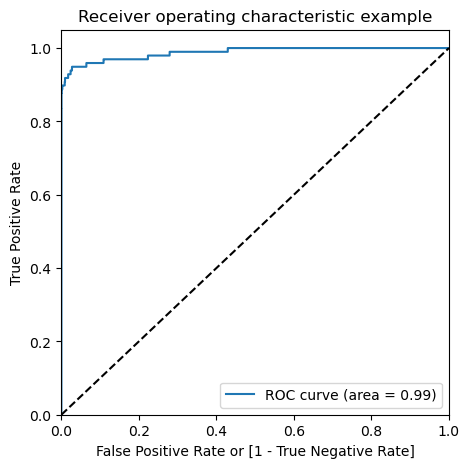

In [481]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train data                       
  - Accuracy    :  100%                
  - Sensitivity :  100%
  - Specifivty  :  100%
  - F1-Score    :  100%
  - ROC         :  100%

- Test data                       
  - Accuracy    :  100%                  
  - Sensitivity :  88%
  - Specifivty  :  100%
  - F1-Score    :  84%
  - ROC         :  99%

## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

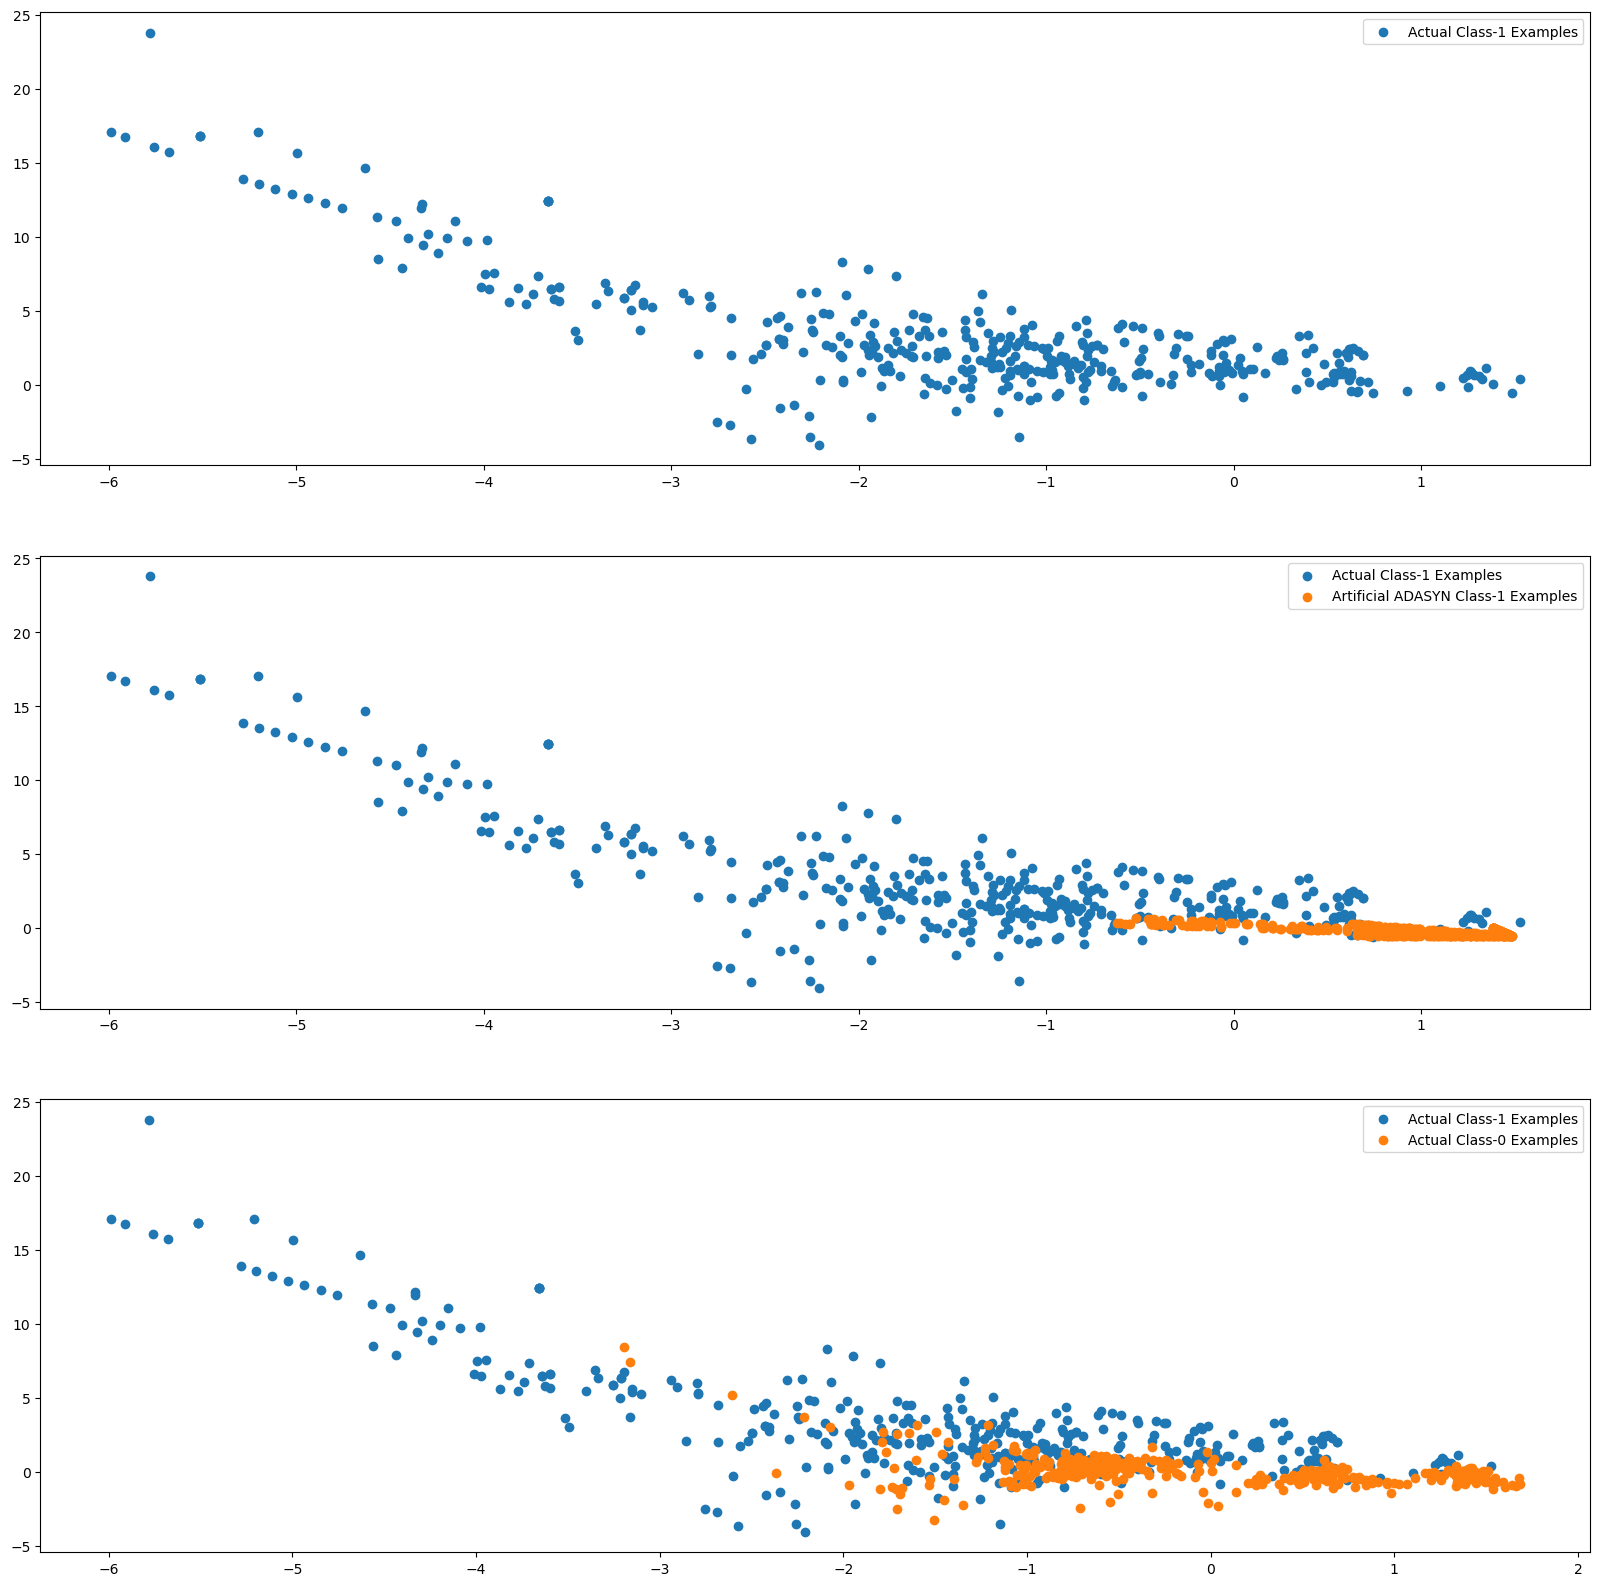

In [372]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with ADASYN

In [375]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best ROC AUC score:  0.9616414665148837
Best hyperparameters:  {'C': 1000}


In [377]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.540492,0.028008,0.050399,0.003476,0.001,{'C': 0.001},0.959097,0.959175,0.959434,0.959235,0.000144,7,0.959352,0.959124,0.959279,0.959251,0.000095
1,0.683137,0.021468,0.050499,0.002567,0.010,{'C': 0.01},0.961196,0.961285,0.961634,0.961372,0.000189,6,0.961506,0.961237,0.961431,0.961391,0.000113
2,0.693042,0.031271,0.053040,0.008887,0.100,{'C': 0.1},0.961446,0.961528,0.961888,0.961620,0.000192,5,0.961764,0.961480,0.961678,0.961640,0.000119
3,0.674880,0.027913,0.047965,0.001247,1.000,{'C': 1},0.961467,0.961546,0.961907,0.961640,0.000192,4,0.961786,0.961498,0.961698,0.961660,0.000120
4,0.701091,0.018858,0.051014,0.000803,10.000,{'C': 10},0.961469,0.961544,0.961909,0.961641,0.000192,3,0.961788,0.961497,0.961699,0.961661,0.000122
5,0.651882,0.010695,0.058396,0.008084,100.000,{'C': 100},0.961470,0.961545,0.961909,0.961641,0.000192,2,0.961788,0.961498,0.961700,0.961662,0.000121
6,0.656182,0.010288,0.049400,0.000853,1000.000,{'C': 1000},0.961470,0.961546,0.961909,0.961641,0.000192,1,0.961788,0.961498,0.961700,0.961662,0.000121


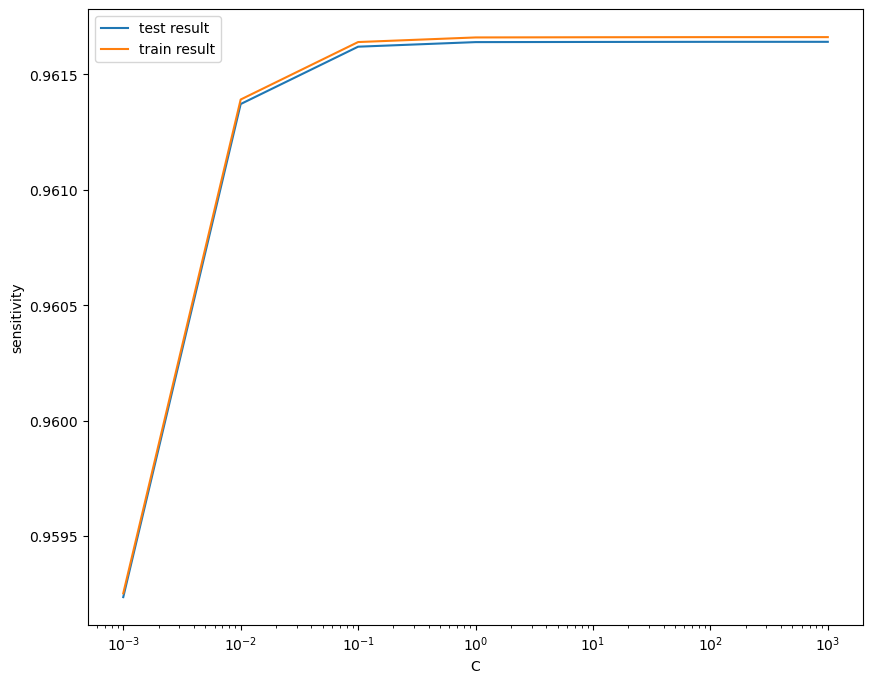

In [379]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [382]:
model_cv.best_params_

{'C': 1000}

In [384]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Evaluating the model with train data

In [387]:
# Evaluating on train data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)

In [389]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [391]:
# Printing the scores
Scores(y_train_adasyn,y_train_pred,y_train_pred_proba)

[[205598  21853]
 [ 26751 200683]]
Accuracy:  0.8931510161909054
Sensitivity:  0.8823790638163159
Specificity:  0.9039221634549859
F1-Score:  0.891983910038447
              precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885

roc_auc train score:  0.9616624444910064


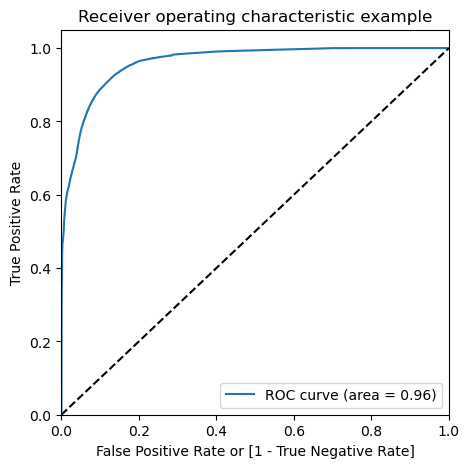

In [393]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [396]:
# Evaluating on test data
y_test_pred = logreg_adasyn_model.predict(X_test)

In [398]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]

In [400]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[51296  5568]
 [    5    93]]
Accuracy:  0.9021628454057091
Sensitivity:  0.9489795918367347
Specificity:  0.9020821609454136
F1-Score:  0.032297273832262545
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962

roc_auc train score:  0.9763100178872899


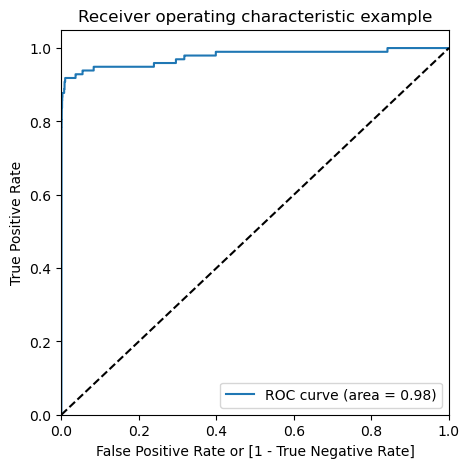

In [402]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  89%                
  - Sensitivity :  88%
  - Specifivty  :  90%
  - F1-Score    :  89%
  - ROC         :  96%

- Test Set                       
  - Accuracy    :  90 %                  
  - Sensitivity :  95%
  - Specifivty  :  90%
  - F1-Score    :  3.2%
  - ROC         :  98%

### 2. Decision Tree on balanced data with ADASYN

In [406]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [408]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9413894747704535
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Model with optimal hyperparameters

In [411]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,100
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Evaluating the model on train data

In [414]:
# Evaluating model on the train data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)

In [416]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [418]:
# Printing the scores
Scores(y_train_adasyn,y_train_pred,y_train_pred_proba)

[[218063   9388]
 [  1555 225879]]
Accuracy:  0.9759433703023841
Sensitivity:  0.9931628516404759
Specificity:  0.9587251759719676
F1-Score:  0.9763497377356003
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      0.99      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885

roc_auc train score:  0.9919256043132074


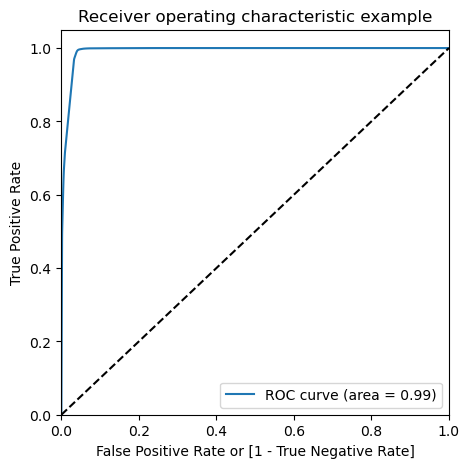

In [420]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [423]:
# Evaluating model on the test data
y_test_pred = dt_adasyn_model.predict(X_test)

In [425]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]

In [427]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[54471  2393]
 [    9    89]]
Accuracy:  0.9578315368140163
Sensitivity:  0.9081632653061225
Specificity:  0.9579171356218346
F1-Score:  0.06899224806201551
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962

roc_auc train score:  0.9659234385228487


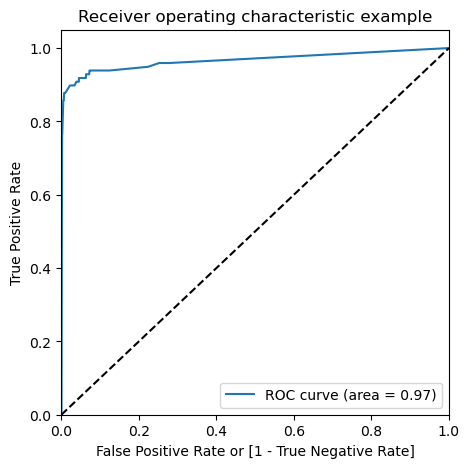

In [429]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  98%                
  - Sensitivity :  99%
  - Specifivty  :  96%
  - F1-Score    :  98%
  - ROC         :  99%

- Test Set                       
  - Accuracy    :  96%                  
  - Sensitivity :  91%
  - Specifivty  :  96%
  - F1-Score    :  6.8%
  - ROC         :  97%

### 3. XGBoost on balanced data with ADASYN

In [433]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 1.0]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'subsample': [0.3, 0.6, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'binary:logistic'


In [435]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.850914,0.087512,0.092845,0.001701,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.972904,0.961024,0.988856,0.974261,0.011403,16,0.996776,0.996666,0.995616,0.996352,0.000523
1,2.008273,0.249737,0.099235,0.010167,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.973641,0.963154,0.988926,0.975240,0.010582,14,0.996475,0.996641,0.995468,0.996195,0.000518
2,1.846461,0.143063,0.095181,0.001886,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.973497,0.962752,0.989657,0.975302,0.011058,13,0.996517,0.996424,0.995612,0.996184,0.000406
3,1.379520,0.014224,0.096902,0.003016,0.1,1.0,"{'learning_rate': 0.1, 'subsample': 1.0}",0.972153,0.961645,0.989189,0.974329,0.011350,15,0.996274,0.996388,0.995449,0.996037,0.000418
4,2.161981,0.146641,0.114570,0.012379,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.982385,0.967957,0.995282,0.981874,0.011161,11,0.998848,0.999108,0.998558,0.998838,0.000225
5,1.845914,0.020880,0.097513,0.002450,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982086,0.967673,0.996356,0.982038,0.011710,10,0.998879,0.999084,0.998824,0.998929,0.000112
6,2.061001,0.223133,0.108517,0.009419,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982781,0.965640,0.995983,0.981468,0.012422,12,0.998981,0.998900,0.998709,0.998863,0.000114
7,1.490239,0.083908,0.103849,0.006183,0.2,1.0,"{'learning_rate': 0.2, 'subsample': 1.0}",0.982501,0.968235,0.996723,0.982486,0.011630,9,0.998919,0.999075,0.998816,0.998936,0.000106
8,1.963083,0.051378,0.114235,0.012540,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",0.987806,0.966063,0.997956,0.983942,0.013304,8,0.999582,0.999628,0.999553,0.999588,0.000031
9,2.275988,0.194774,0.099184,0.005254,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.988212,0.967681,0.997445,0.984446,0.012440,7,0.999569,0.999631,0.999488,0.999563,0.000058


In [437]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9881000316705739
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [440]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [442]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Evaluating the model on the train data

In [445]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)

In [447]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [449]:
# Printing the scores
Scores(y_train_adasyn,y_train_pred,y_train_pred_proba)

[[227443      8]
 [     0 227434]]
Accuracy:  0.9999824131373863
Sensitivity:  1.0
Specificity:  0.999964827589239
F1-Score:  0.9999824127894196
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885

roc_auc train score:  1.0


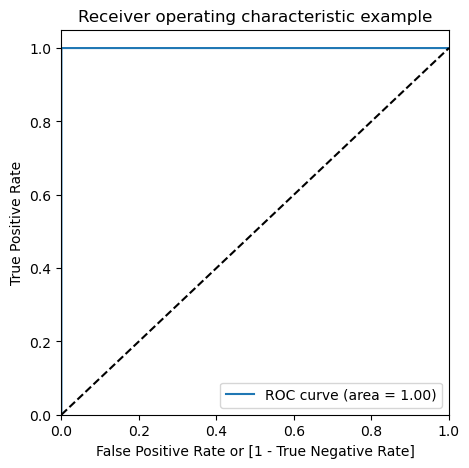

In [451]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [454]:
# Predicting on the test set
y_test_pred = xgb_adasyn_model.predict(X_test)

In [456]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]

In [458]:
# Printing the scores
Scores(y_test,y_test_pred,y_test_pred_proba)

[[56839    25]
 [   12    86]]
Accuracy:  0.9993504441557529
Sensitivity:  0.8775510204081632
Specificity:  0.9995603545301069
F1-Score:  0.8229665071770335
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc train score:  0.9815557061316367


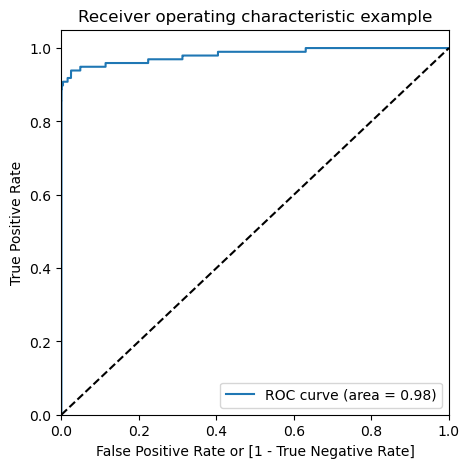

In [460]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train Set                       
  - Accuracy    :  100%                
  - Sensitivity :  100%
  - Specifivty  :  100%
  - F1-Score    :  100%
  - ROC         :  100%

- Test Set                       
  - Accuracy    :  99%                  
  - Sensitivity :  88%
  - Specifivty  :  99%
  - F1-Score    :  82%
  - ROC         :  98%

### Select the oversampling method which shows the best result on a model
We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with SMOTE technique. We got ROC score 100% on train data and 99% on the test data and F1 score 100% on train data and 84% in the test data. 

Hence, we conclude that the `XGBoost model with SMOTE` is the best model.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


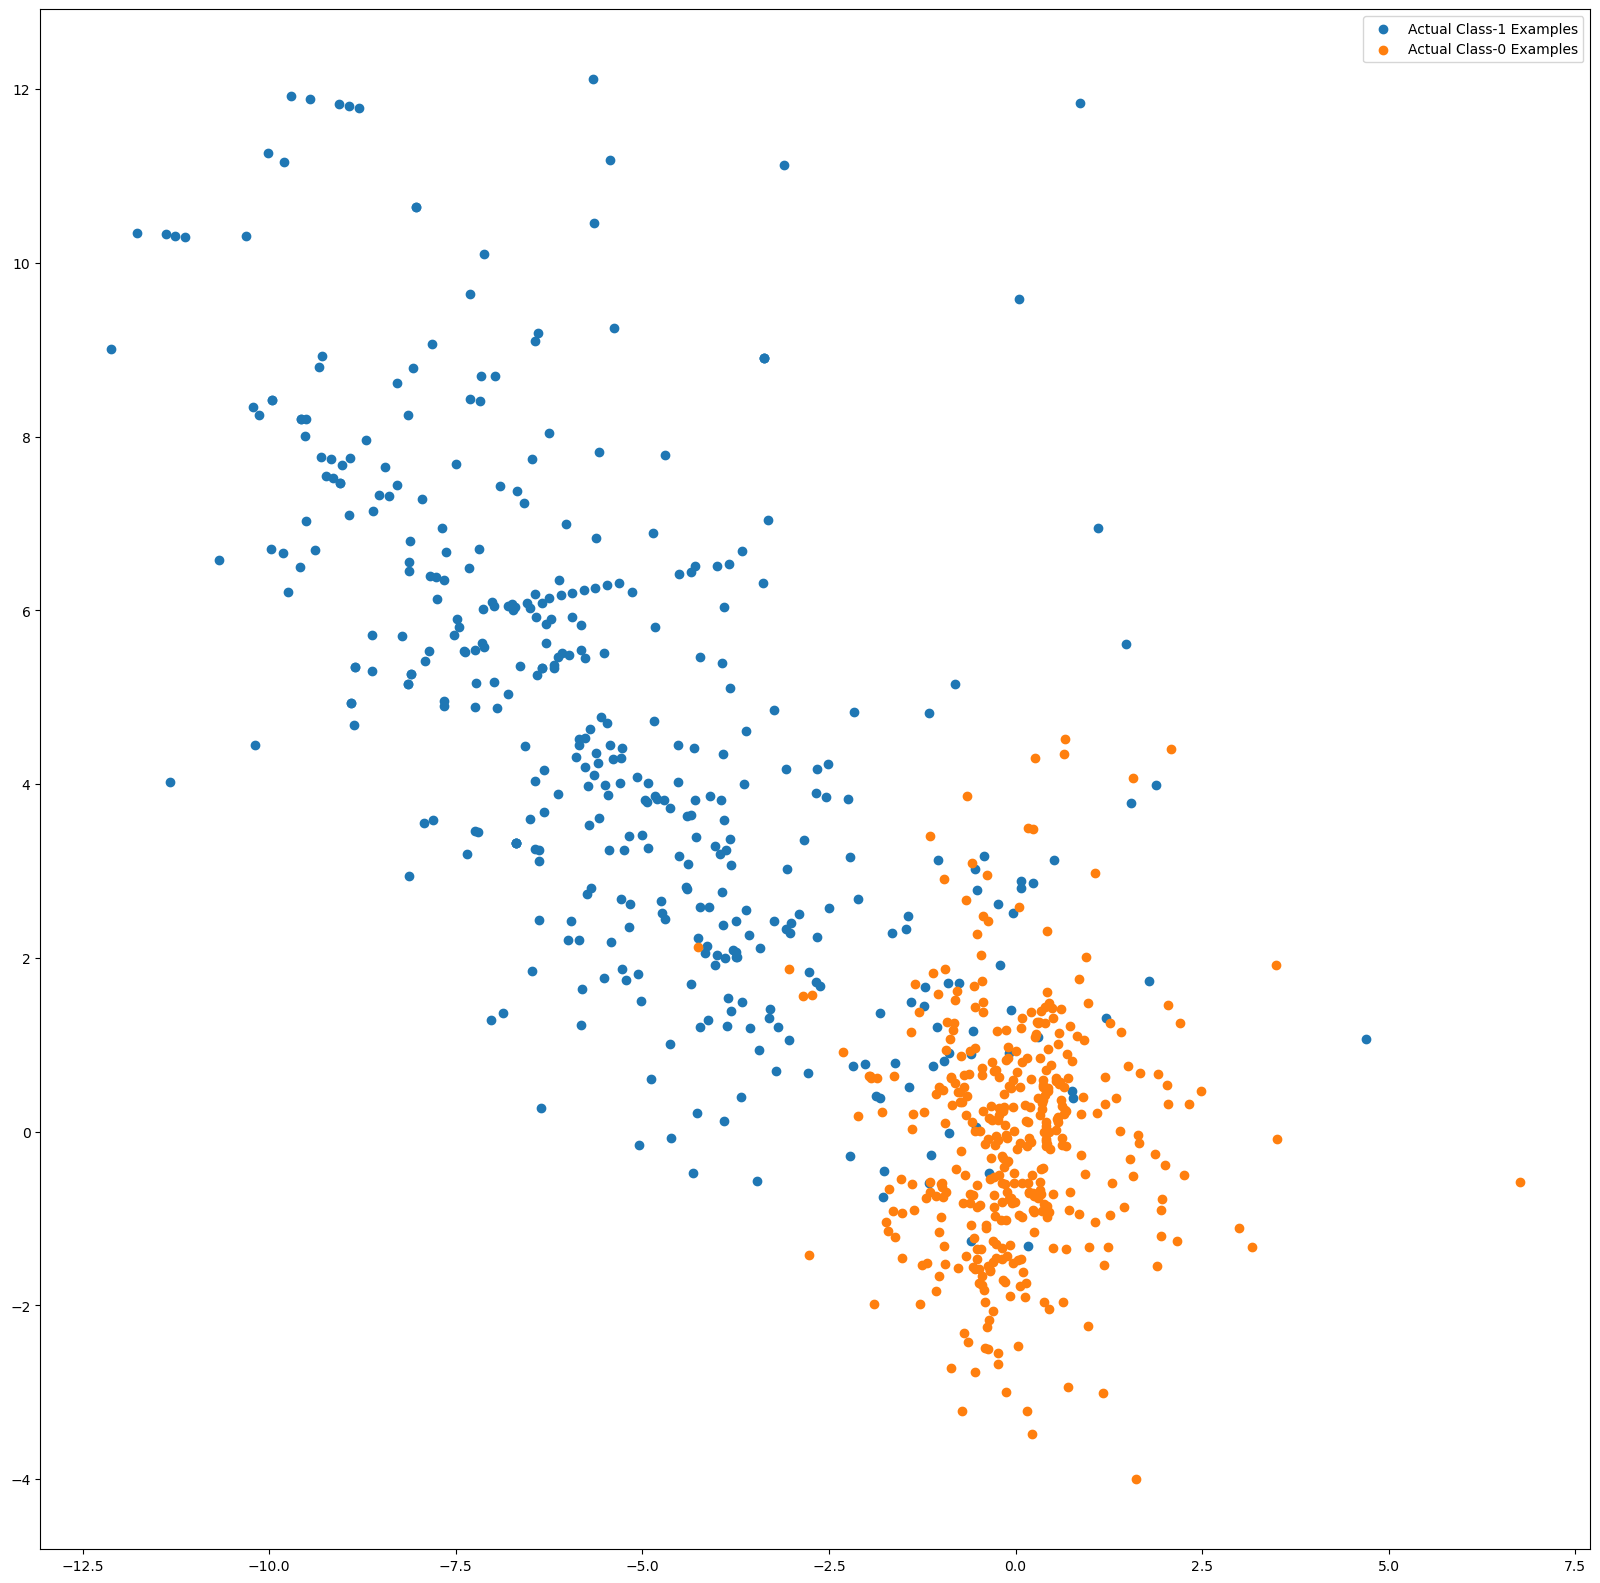

In [463]:
var_imp = []
for i in xgb_smote_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the ROC Curve

In [486]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999999999033518
0.825069


We have found that 83% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

# Summary
## Strategic Selection of XGBoost Model for Credit Card Fraud Detection

- In the pursuit of an effective solution to address credit card fraud detection, our primary objective is to achieve a high recall rate. A high recall is crucial to identifying a significant proportion of actual fraudulent transactions, offering a robust defense mechanism against potential high-value fraudulent activities. 


- Given the severe consequences that banking institutions face in terms of monetary losses, credibility, and trust due to fraudulent transactions, prioritizing recall becomes a strategic choice to safeguard both the financial well-being of banks and the interests of their customers.

## Model Evaluation and Selection Process

In our analysis, we systematically experimented with various machine learning models, leveraging the power of the SMOTE (Synthetic Minority Oversampling Technique) technique to balance the highly imbalanced dataset. Among the models considered, the XGBoost model emerged as a standout performer. Here are the key findings:

- **ROC Score:** The XGBoost model exhibited a commendable **ROC score of 99%**, showcasing its ability to effectively distinguish between positive and negative classes.

- **Recall Rate:** The standout feature was the exceptionally high **Recall rate of 88%** in the balanced dataset. This metric is crucial in ensuring that a substantial portion of actual fraudulent transactions is correctly identified.

## Rationale for Choosing XGBoost

- Therefore, based on a comprehensive evaluation of performance metrics, the XGBoost model, when coupled with the SMOTE technique on a balanced dataset, emerges as the preferred choice for our credit card fraud detection solution. This strategic decision is grounded in the model's ability to not only deliver an impressive ROC score but, more importantly, to prioritize recall—a critical factor in mitigating the impact of fraudulent transactions on both financial institutions and their clientele.


- By adopting the **XGBoost model within the framework of SMOTE**, we are poised to enhance the proactive monitoring and fraud prevention measures implemented by banks, thereby fortifying their defenses against the evolving landscape of credit card fraud.



<br/>
<br/>
<br/>
<div style="text-align:center; color:black; font-size:50px; font-family:cursive; ">End of the Capstone project , Thank you!</div>
<br/>
<br/>
<br/>
<br/>